In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## DATA READING

In [2]:
# Set the file path

file_path = '~/Google Drive File Stream/Mi unidad/Group D/Real_Word_FIles/Data/'

#### Climate Dataset

In [4]:
## Read the climate file

db_climate = pd.read_csv(os.path.join(file_path, 'db_climate.csv'),decimal=',')

db_climate.shape

(6900, 6)

In [5]:
# verify loading was corrrect and change the colmn titles to lower case


db_climate.columns = db_climate.columns.str.lower()
db_climate.head()

,cod_semana,cod_provincia,temp_minima,temp_maxima,temp_media,precipitacion
0,1,1,4.96,10.74,7.47,0.76
1,1,2,6.14,14.00,9.21,0.31
2,1,3,10.11,16.01,12.50,0.10
3,1,4,10.44,14.86,12.57,0.59
4,1,5,2.63,9.63,5.49,2.47


#### Projections Dataset

In [6]:
# Read the projections file

db_projections = pd.read_csv(os.path.join(file_path, 'db_projections.csv'),decimal=',')

In [7]:
# verify loading was corrrect

db_projections.head()

,cod_tienda,cod_semana,factor_extrapolacion
0,1,1,54.85
1,1,2,55.67
2,1,3,55.68
3,1,4,55.57
4,1,5,55.57


#### Sales Dataset

In [8]:
db_sales = pd.read_csv(os.path.join(file_path, 'db_sales.csv'),decimal=',')

db_sales.shape

(6258139, 11)

In [9]:
db_sales['ventas_unidades'] = db_sales['ventas_unidades'].apply(lambda number: float(number))
db_sales['ventas_valor'] = db_sales['ventas_valor'].apply(lambda number: float(number))
db_sales['ventas_volumen'] = db_sales['ventas_volumen'].apply(lambda number: float(number))

In [10]:
# verify that the loading was correct

db_sales.head()

,cod_tienda,cod_semana,cod_producto,ventas_unidades,ventas_valor,ventas_volumen,numero_referencias,precio_real_unidades,precio_real_volumen,precio_tarifa_unidades,precio_tarifa_volumen
0,528,1,309,84.0,64.0,28.0,1,0.76,0.33,0.76,0.33
1,528,1,408,24.0,32.0,12.0,1,1.35,0.50,1.35,0.50
2,528,1,601,40.0,33.0,13.0,1,0.83,0.33,0.83,0.33
3,528,1,625,39.0,48.0,14.0,1,1.23,0.36,1.23,0.36
4,528,1,654,9.0,27.0,14.0,1,2.99,1.50,3.52,1.50


In [11]:
db_sales['val'] = db_sales['precio_real_unidades'] * db_sales['ventas_unidades']

In [12]:
sales_proj = db_sales.merge(db_projections, on=['cod_tienda','cod_semana'])
sales_proj.shape

(6258139, 13)

In [13]:
sales_proj['ventas_valor'] = sales_proj['ventas_valor'] * sales_proj['factor_extrapolacion']
sales_proj['ventas_unidades'] = sales_proj['ventas_unidades'] * sales_proj['factor_extrapolacion']
sales_proj['ventas_volumen'] = sales_proj['ventas_volumen'] * sales_proj['factor_extrapolacion']

In [14]:
sales_proj['val'] = sales_proj['val'] * sales_proj['factor_extrapolacion']

In [15]:
(sales_proj['val'] - sales_proj['ventas_valor']).sum() / 1000000

92.34625289856955

In [16]:
sales_proj['ventas_valor'].sum() / 1000000

3418.8518912573204

In [17]:
((sales_proj['val'] - sales_proj['ventas_valor']).sum() / 1000000)/ (sales_proj['ventas_valor'].sum() / 1000000) *100

2.7010896007141216

In [18]:
db_sales = sales_proj.copy()

#### Products Dataset

In [19]:
## Read the products file
# Lower case the column names

db_products = pd.read_csv(os.path.join(file_path, 'db_products.csv'),decimal=',')

db_products.columns = db_products.columns.str.lower()

In [20]:
# lower case the column values

db_products.loc[:,'category':'units'] = db_products.loc[:,'category':'units'].apply(lambda x: x.str.lower())

In [21]:
# remove the string from the colume and units variables so that we can use it just as numbers

import re

#volume

db_products['volume'] = db_products['volume'].apply(lambda string: re.findall('\d+', string))
db_products['volume'] = db_products['volume'].apply(lambda number: int(number[0]))

#units

db_products['units'] = db_products['units'].apply(lambda string: re.findall('\d+', string))
db_products['units'] = db_products['units'].apply(lambda number: int(number[0]))

In [22]:
# verify that loading and changes were done correctly

db_products.head()

,cod_producto,category,segment,manufacturer,brand,packaging,volume,units
0,1,beer,artisans,other manufacturers,other man - other brands,cristal bottle,330,1
1,2,beer,artisans,other manufacturers,other man - other brands,cristal bottle,330,1
2,3,beer,artisans,other manufacturers,other man - other brands,cristal bottle,330,1
3,4,beer,artisans,other manufacturers,other man - other brands,cristal bottle,330,1
4,5,beer,artisans,other manufacturers,other man - other brands,cristal bottle,330,1


#### Provinces Dataset

In [23]:
## Read the provinces file
## Change the columns to lower case

db_provinces = pd.read_csv(os.path.join(file_path, 'db_provinces.csv'),decimal=',')

db_provinces.columns = db_provinces.columns.str.lower()

db_provinces.shape


(52, 3)

In [24]:
# verify that the loading was done correctly

db_provinces.head()

,cod_provincia,provincia,comunidad autónoma
0,1,Alava,País Vasco
1,2,Albacete,Castilla-La Mancha
2,3,Alicante,Comunidad Valenciana
3,4,Almeria,Andalucía
4,5,Avila,Castilla y León


#### Stores Dataset

In [25]:
## Read the stores file

db_stores = pd.read_csv(os.path.join(file_path, 'db_stores.csv'),decimal=',')

db_stores.shape

(557, 5)

In [26]:
## verify that the loading was done correctly

db_stores.head()

,cod_tienda,cod_canal,cod_provincia,postal_code,sales_surface_sqmeters
0,1,1,4,4008,500
1,2,1,95,28002,500
2,3,1,39,39005,1200
3,4,1,48,48001,2200
4,5,1,12,12100,900


#### Time Dataset

In [27]:
## Read the time dataset

db_time = pd.read_csv(os.path.join(file_path, 'db_time.csv'),decimal=',')

db_time.shape

(140, 3)

In [28]:
## verify that the loading was done correctly

db_time.head()

,cod_semana,Date,Period
0,1,07/01/2017,YEAR 2017
1,2,14/01/2017,YEAR 2017
2,3,21/01/2017,YEAR 2017
3,4,28/01/2017,YEAR 2017
4,5,04/02/2017,YEAR 2017


In [29]:
db_time.tail()

,cod_semana,Date,Period
135,136,10/08/2019,YEAR 2019
136,137,17/08/2019,YEAR 2019
137,138,24/08/2019,YEAR 2019
138,139,31/08/2019,YEAR 2019
139,140,07/09/2019,YEAR 2019


#### Promotions Dataset

In [30]:
# Read the promotions file

db_promotions = pd.read_csv(os.path.join(file_path, 'db_promotions.csv'),decimal=',')

db_promotions.shape

(2305961, 4)

In [31]:
df = pd.DataFrame({'Total' : db_promotions.groupby( ['cod_tienda','cod_semana','cod_producto']).size()}).reset_index(['cod_tienda','cod_semana','cod_producto'])

In [32]:
df_1 = pd.DataFrame({'Promo cabecera' : db_promotions[db_promotions['promocion']=='Promo cabecera'].groupby( ['cod_tienda','cod_semana','cod_producto']).size()}).reset_index(['cod_tienda','cod_semana','cod_producto'])
df_2 = pd.DataFrame({'Promo descuento' : db_promotions[db_promotions['promocion']=='Promo descuento'].groupby( ['cod_tienda','cod_semana','cod_producto']).size()}).reset_index(['cod_tienda','cod_semana','cod_producto'])
df_3 = pd.DataFrame({'Promo expositor' : db_promotions[db_promotions['promocion']=='Promo expositor'].groupby( ['cod_tienda','cod_semana','cod_producto']).size()}).reset_index(['cod_tienda','cod_semana','cod_producto'])
df_4 = pd.DataFrame({'Promo extra cantidad' : db_promotions[db_promotions['promocion']=='Promo extra cantidad'].groupby( ['cod_tienda','cod_semana','cod_producto']).size()}).reset_index(['cod_tienda','cod_semana','cod_producto'])
df_5 = pd.DataFrame({'Promo folleto' : db_promotions[db_promotions['promocion']=='Promo folleto'].groupby( ['cod_tienda','cod_semana','cod_producto']).size()}).reset_index(['cod_tienda','cod_semana','cod_producto'])
df_6 = pd.DataFrame({'Promo multicompra' : db_promotions[db_promotions['promocion']=='Promo multicompra'].groupby( ['cod_tienda','cod_semana','cod_producto']).size()}).reset_index(['cod_tienda','cod_semana','cod_producto'])
df_7 = pd.DataFrame({'Promo isla' : db_promotions[db_promotions['promocion']=='Promo isla'].groupby( ['cod_tienda','cod_semana','cod_producto']).size()}).reset_index(['cod_tienda','cod_semana','cod_producto'])
df_8 = pd.DataFrame({'Promo regalo' : db_promotions[db_promotions['promocion']=='Promo regalo'].groupby( ['cod_tienda','cod_semana','cod_producto']).size()}).reset_index(['cod_tienda','cod_semana','cod_producto'])

In [33]:
df_final = pd.merge(left=df,right=df_2, how='left', left_on=['cod_tienda','cod_semana','cod_producto'], right_on=['cod_tienda','cod_semana','cod_producto'])
df_final = pd.merge(left=df_final,right=df_3, how='left', left_on=['cod_tienda','cod_semana','cod_producto'], right_on=['cod_tienda','cod_semana','cod_producto'])
df_final = pd.merge(left=df_final,right=df_4, how='left', left_on=['cod_tienda','cod_semana','cod_producto'], right_on=['cod_tienda','cod_semana','cod_producto'])
df_final = pd.merge(left=df_final,right=df_5, how='left', left_on=['cod_tienda','cod_semana','cod_producto'], right_on=['cod_tienda','cod_semana','cod_producto'])
df_final = pd.merge(left=df_final,right=df_6, how='left', left_on=['cod_tienda','cod_semana','cod_producto'], right_on=['cod_tienda','cod_semana','cod_producto'])
df_final = pd.merge(left=df_final,right=df_7, how='left', left_on=['cod_tienda','cod_semana','cod_producto'], right_on=['cod_tienda','cod_semana','cod_producto'])
df_final = pd.merge(left=df_final,right=df_8, how='left', left_on=['cod_tienda','cod_semana','cod_producto'], right_on=['cod_tienda','cod_semana','cod_producto'])
df_final = pd.merge(left=df_final,right=df_1, how='left', left_on=['cod_tienda','cod_semana','cod_producto'], right_on=['cod_tienda','cod_semana','cod_producto'])

In [34]:
df_final = pd.merge(left=df_final,right=db_time[['cod_semana','Date']], how='left', left_on=['cod_semana'], right_on=['cod_semana'])

In [35]:
df_final = df_final.fillna(0)
df_final = df_final.drop('Date',axis=1)

In [36]:
db_promotions = df_final.copy()

In [37]:
db_promotions.head()

,cod_tienda,cod_semana,cod_producto,Total,Promo descuento,Promo expositor,Promo extra cantidad,Promo folleto,Promo multicompra,Promo isla,Promo regalo,Promo cabecera
0,1,1,222,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,612,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,625,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,832,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,869,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## DATA IMPROVEMENT

In [38]:
# parse the dates so that it is read as datetime
# create a dictionary with the dates from the time table

db_time['Date'] =  db_time['Date'].apply(lambda date: pd.datetime.strptime(date, '%d/%m/%Y'))

date_dict = dict(zip(db_time['cod_semana'], db_time['Date']))

In [39]:
# use the dictionary to map the value in the sales table


db_sales['cod_semana'] = db_sales['cod_semana'].map(date_dict)


In [40]:
# use the dictionary to map the value in the sales table

db_promotions['cod_semana'] = db_promotions['cod_semana'].map(date_dict)

In [41]:
canal_dict = {1:'super'}

In [42]:
# verify new dataset

db_sales.head()

,cod_tienda,cod_semana,cod_producto,ventas_unidades,ventas_valor,ventas_volumen,numero_referencias,precio_real_unidades,precio_real_volumen,precio_tarifa_unidades,precio_tarifa_volumen,val,factor_extrapolacion
0,528,2017-01-07,309,1176.84,896.64,392.28,1,0.76,0.33,0.76,0.33,894.3984,14.01
1,528,2017-01-07,408,336.24,448.32,168.12,1,1.35,0.50,1.35,0.50,453.9240,14.01
2,528,2017-01-07,601,560.40,462.33,182.13,1,0.83,0.33,0.83,0.33,465.1320,14.01
3,528,2017-01-07,625,546.39,672.48,196.14,1,1.23,0.36,1.23,0.36,672.0597,14.01
4,528,2017-01-07,654,126.09,378.27,196.14,1,2.99,1.50,3.52,1.50,377.0091,14.01


In [43]:
# use the dictionary to map the value in the climate table

db_climate['cod_semana'] = db_climate['cod_semana'].map(date_dict)


In [44]:
# verify new dataset

db_climate.head()

,cod_semana,cod_provincia,temp_minima,temp_maxima,temp_media,precipitacion
0,2017-01-07,1,4.96,10.74,7.47,0.76
1,2017-01-07,2,6.14,14.00,9.21,0.31
2,2017-01-07,3,10.11,16.01,12.50,0.10
3,2017-01-07,4,10.44,14.86,12.57,0.59
4,2017-01-07,5,2.63,9.63,5.49,2.47


## DATA MERGING

#### Sale + Product

In [45]:
# merge the sales dataset with the prodcuts dataset
# we do an inner join here because we don't have any products without having been sold

sale_by_prod = db_sales.merge(db_products,on='cod_producto')

In [46]:
sale_by_prod.head()

,cod_tienda,cod_semana,cod_producto,ventas_unidades,ventas_valor,ventas_volumen,numero_referencias,precio_real_unidades,precio_real_volumen,precio_tarifa_unidades,precio_tarifa_volumen,val,factor_extrapolacion,category,segment,manufacturer,brand,packaging,volume,units
0,528,2017-01-07,309,1176.84,896.64,392.28,1,0.76,0.33,0.76,0.33,894.3984,14.01,beer,extra,manufacturer 1,man 1 - brand 1,can,330,1
1,401,2017-01-07,309,1176.84,896.64,392.28,1,0.76,0.33,0.76,0.33,894.3984,14.01,beer,extra,manufacturer 1,man 1 - brand 1,can,330,1
2,256,2017-01-07,309,1176.84,896.64,392.28,1,0.76,0.33,0.76,0.33,894.3984,14.01,beer,extra,manufacturer 1,man 1 - brand 1,can,330,1
3,521,2017-01-07,309,382.20,291.20,127.40,1,0.76,0.33,0.76,0.33,290.4720,4.55,beer,extra,manufacturer 1,man 1 - brand 1,can,330,1
4,159,2017-01-07,309,1176.84,896.64,392.28,1,0.76,0.33,0.76,0.33,894.3984,14.01,beer,extra,manufacturer 1,man 1 - brand 1,can,330,1


#### Stores + Provinces

In [47]:
# merge the province and stores dataset
# we do a left join here because we have some provinces that don't have any stores

store_by_prov = db_stores.merge(db_provinces,on=['cod_provincia'], how='left')
store_by_prov.shape

(557, 7)

In [48]:
# verify that it was done correctly

store_by_prov.head()

,cod_tienda,cod_canal,cod_provincia,postal_code,sales_surface_sqmeters,provincia,comunidad autónoma
0,1,1,4,4008,500,Almeria,Andalucía
1,2,1,95,28002,500,Area Metropolitana de Madrid,Madrid
2,3,1,39,39005,1200,Cantabria,Cantabria
3,4,1,48,48001,2200,Vizcaya,País Vasco
4,5,1,12,12100,900,Castellon,Comunidad Valenciana


#### Sales + Product + Stores

In [49]:
# merge the sale by product dataset with the stores by province dataset

sale_store = sale_by_prod.merge(store_by_prov, on=['cod_tienda'],how='left')

sale_store.shape

(6258139, 26)

In [50]:
# verify that everything was done correctly


sale_store.head()

,cod_tienda,cod_semana,cod_producto,ventas_unidades,ventas_valor,ventas_volumen,numero_referencias,precio_real_unidades,precio_real_volumen,precio_tarifa_unidades,...,brand,packaging,volume,units,cod_canal,cod_provincia,postal_code,sales_surface_sqmeters,provincia,comunidad autónoma
0,528,2017-01-07,309,1176.84,896.64,392.28,1,0.76,0.33,0.76,...,man 1 - brand 1,can,330,1,1,95,28017,500,Area Metropolitana de Madrid,Madrid
1,401,2017-01-07,309,1176.84,896.64,392.28,1,0.76,0.33,0.76,...,man 1 - brand 1,can,330,1,1,95,28937,600,Area Metropolitana de Madrid,Madrid
2,256,2017-01-07,309,1176.84,896.64,392.28,1,0.76,0.33,0.76,...,man 1 - brand 1,can,330,1,1,95,28026,400,Area Metropolitana de Madrid,Madrid
3,521,2017-01-07,309,382.20,291.20,127.40,1,0.76,0.33,0.76,...,man 1 - brand 1,can,330,1,1,28,28600,1400,Madrid,Madrid
4,159,2017-01-07,309,1176.84,896.64,392.28,1,0.76,0.33,0.76,...,man 1 - brand 1,can,330,1,1,95,28027,700,Area Metropolitana de Madrid,Madrid


#### Sales + Products + Stores + Climate

In [51]:
sale_climate = sale_store.merge(db_climate, on=['cod_provincia','cod_semana'],how='left')
sale_climate.shape

(6258139, 30)

#### Final Dataset

In [52]:
# final dataset is the merging of everything we've previously done

dataset = sale_climate.merge(db_promotions, on=['cod_tienda','cod_semana','cod_producto'],how='left')
dataset.shape

(6258139, 39)

In [53]:
## verify that the loading was done correctly
dataset = dataset.fillna(0)
dataset.head()

,cod_tienda,cod_semana,cod_producto,ventas_unidades,ventas_valor,ventas_volumen,numero_referencias,precio_real_unidades,precio_real_volumen,precio_tarifa_unidades,...,precipitacion,Total,Promo descuento,Promo expositor,Promo extra cantidad,Promo folleto,Promo multicompra,Promo isla,Promo regalo,Promo cabecera
0,528,2017-01-07,309,1176.84,896.64,392.28,1,0.76,0.33,0.76,...,0.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,401,2017-01-07,309,1176.84,896.64,392.28,1,0.76,0.33,0.76,...,0.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,256,2017-01-07,309,1176.84,896.64,392.28,1,0.76,0.33,0.76,...,0.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,521,2017-01-07,309,382.20,291.20,127.40,1,0.76,0.33,0.76,...,0.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,159,2017-01-07,309,1176.84,896.64,392.28,1,0.76,0.33,0.76,...,0.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
# set the week as an index

dataset = dataset.set_index('cod_semana')

## VISUALIZATIONS

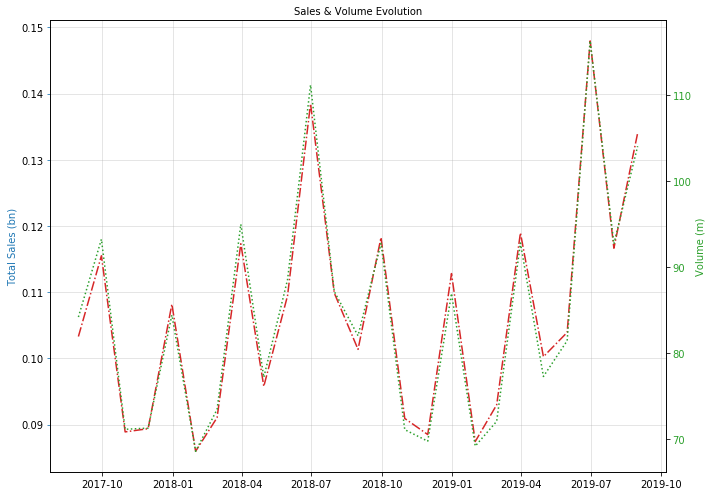

In [289]:

with plt.style.context('tableau-colorblind10'):

# Prepare Data
    df = pd.DataFrame(dataset.loc['2017-08':'2019-08',['ventas_valor','ventas_volumen']].resample('M').sum().reset_index(), columns = ['cod_semana','ventas_valor','ventas_volumen'])
    x = df['cod_semana']
    y1 = df['ventas_valor'] / 1000000000
    y2 = df['ventas_volumen'] / 1000000

# Plot Line1 (Left Y Axis)
    fig, ax1 = plt.subplots(1,1,figsize=(10,7))
    ax1.plot(x, y1, color='tab:red',linestyle='-.')

# Plot Line2 (Right Y Axis)
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    ax2.plot(x, y2, color='tab:green',linestyle=':')

# Decorations
# ax1 (left Y axis)
    ax1.tick_params(axis='x', rotation=0, labelsize=10)
    ax1.set_ylabel('Total Sales (bn)', color='tab:blue', fontsize=10)
    ax1.tick_params(axis='y', color='tab:blue',rotation=0)
    ax1.grid(alpha=.4)

# ax2 (right Y axis)
    ax2.set_ylabel('Volume (m)', color='tab:green', fontsize=10)
    ax2.tick_params(axis='y', labelcolor='tab:green')
    ax2.set_title("Sales & Volume Evolution", fontsize=10)
    fig.tight_layout()
    plt.savefig('sales_growth')
    plt.show()

In [325]:
df = pd.DataFrame(dataset.loc['2019-01':'2019-08',['ventas_valor','ventas_volumen']].resample('Y').sum().reset_index(), columns = ['cod_semana','ventas_valor','ventas_volumen'])

In [322]:
df

,cod_semana,ventas_valor,ventas_volumen
0,2019-12-31,9.022913e+08,7.059949e+08


In [324]:
9.022913e+08-8.493775e+08/8.493775e+08

0.06229715291492888

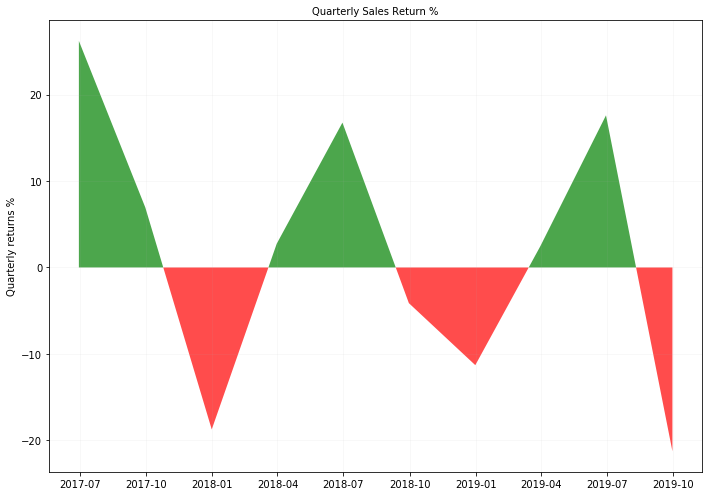

In [336]:
### Plot of change in weekly sales

with plt.style.context('tableau-colorblind10'):

# Prepare Data
    x = dataset.resample('Q')['ventas_valor'].sum().index
    y_returns = (dataset.resample('Q')['ventas_valor'].sum().diff().fillna(0))/dataset.resample('Q')['ventas_valor'].sum().shift(1).fillna(0) * 100

# Plot
    plt.figure(figsize=(10,7))
    plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] >= 0, facecolor='green', interpolate=True, alpha=0.7)
    plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] <= 0, facecolor='red', interpolate=True, alpha=0.7)


# Decorations
    plt.title("Quarterly Sales Return %", fontsize=10)
    plt.ylabel('Quarterly returns %')
    plt.grid(alpha=0.1)
    plt.tight_layout()
    plt.savefig('quarterly')
    plt.show()

In [335]:
y_returns

cod_semana
2017-03-31          NaN
2017-06-30    26.224327
2017-09-30     6.941934
2017-12-31   -18.749824
2018-03-31     2.747865
2018-06-30    16.767778
2018-09-30    -4.129098
2018-12-31   -11.307981
2019-03-31     2.449392
2019-06-30    17.609377
2019-09-30   -21.277370
Freq: Q-DEC, Name: ventas_valor, dtype: float64

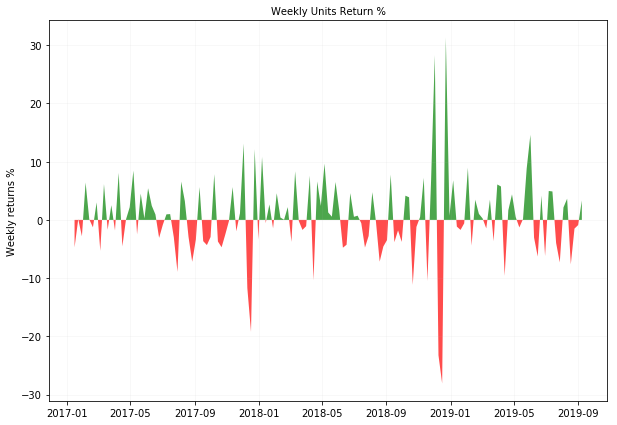

In [100]:
### Plot of change in weekly units

with plt.style.context('tableau-colorblind10'):

# Prepare Data
    x = dataset.resample('W')['ventas_unidades'].sum().index
    y_returns = (dataset.resample('W')['ventas_unidades'].sum().diff().fillna(0))/dataset.resample('W')['ventas_unidades'].sum().shift(1).fillna(0) * 100

# Plot
    plt.figure(figsize=(10,7))
    plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] >= 0, facecolor='green', interpolate=True, alpha=0.7)
    plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] <= 0, facecolor='red', interpolate=True, alpha=0.7)


# Decorations
    plt.title("Weekly Units Return %", fontsize=10)
    plt.ylabel('Weekly returns %')
    plt.grid(alpha=0.1)
    plt.show()

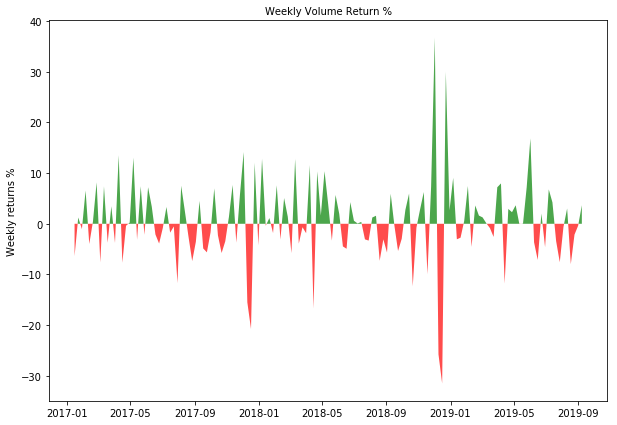

In [101]:
### Plot of change in weekly volume

with plt.style.context('tableau-colorblind10'):

# Prepare Data
    x = dataset.resample('W')['ventas_volumen'].sum().index
    y_returns = (dataset.resample('W')['ventas_volumen'].sum().diff().fillna(0))/dataset.resample('W')['ventas_volumen'].sum().shift(1).fillna(0) * 100

# Plot
    plt.figure(figsize=(10,7))
    plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] >= 0, facecolor='green', interpolate=True, alpha=0.7)
    plt.fill_between(x[1:], y_returns[1:], 0, where=y_returns[1:] <= 0, facecolor='red', interpolate=True, alpha=0.7)


# Decorations
    plt.title("Weekly Volume Return %", fontsize=10)
    plt.ylabel('Weekly returns %')
    plt.show()

#### Growth Rates

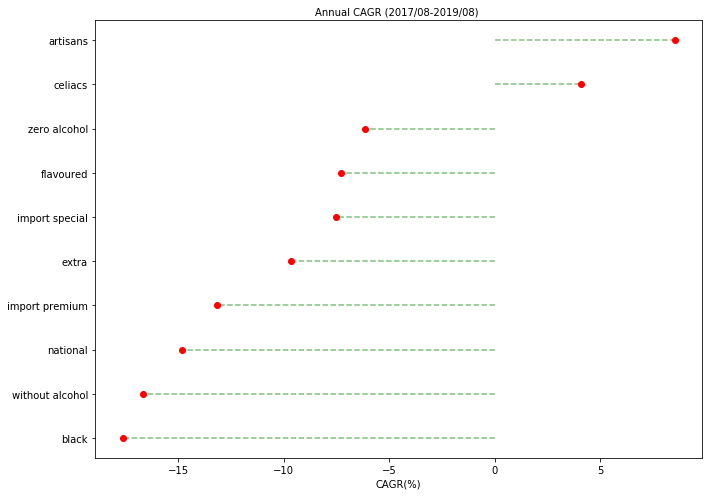

In [60]:
with plt.style.context('tableau-colorblind10'):

# Prepare Data

    compound_sales_growth = pd.DataFrame(dataset.loc['2017':'2019',:].groupby([pd.Grouper(freq='Y'), 'segment'])['ventas_valor'].sum()).unstack().T.reset_index('segment')
    compound_sales_growth.index = compound_sales_growth['segment']
    cagr = ((((compound_sales_growth.iloc[:,3] / compound_sales_growth.iloc[:,1])) ** (1/(2019-2017))) - 1)*100

# Plot
    plt.figure(figsize=(10,7))
    ordered_df = cagr.sort_values(ascending=True)
    my_range=range(1,len(ordered_df.index)+1)
    plt.hlines(y=my_range, xmin=0, xmax=ordered_df, color='green',linestyles='dashed',alpha=0.5)
    plt.plot(ordered_df, my_range, "o", color='red' )

#     
    plt.title('Annual CAGR (2017/08-2019/08) ',fontsize=10)
    plt.tight_layout()
    plt.yticks(my_range, ordered_df.index)
    plt.xlabel('CAGR(%)')
    plt.tight_layout()
    plt.savefig('CAGR_segment.png')
    plt.show()
    

<Figure size 720x504 with 0 Axes>

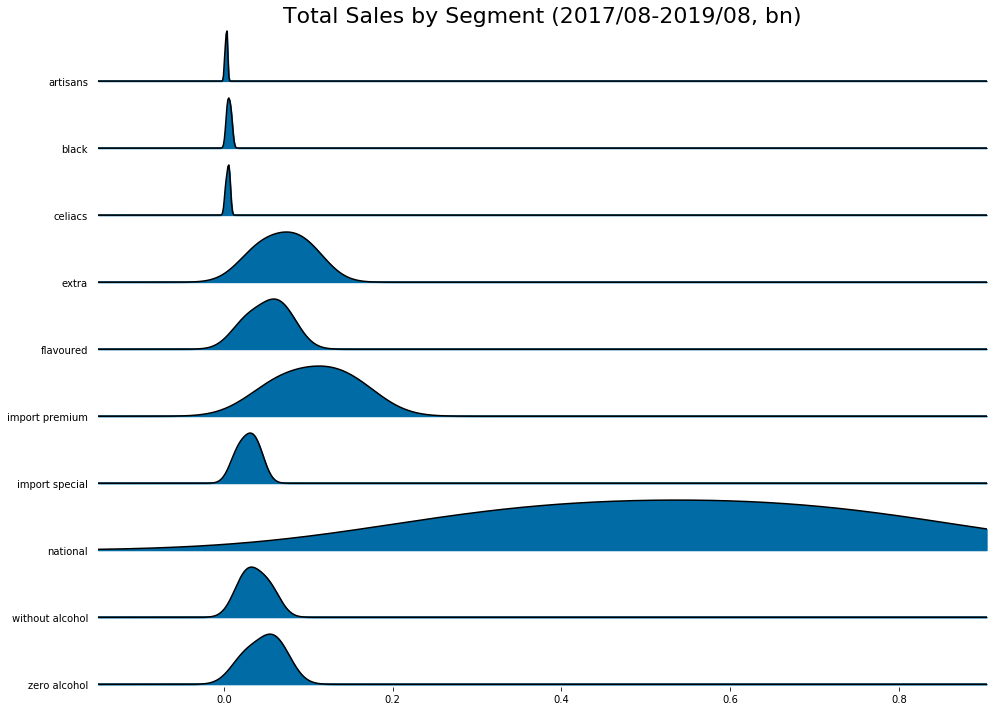

In [336]:
import joypy
with plt.style.context('tableau-colorblind10'):

# Import Data
    df = pd.DataFrame(dataset.loc['2017-08':'2019-08',:].groupby([pd.Grouper(freq='Y'), 'segment'])['ventas_valor'].sum())/1000000000
    df = df.reset_index('cod_semana') 

    plt.figure(figsize=(10,7))
    fig, axes = joypy.joyplot(df, column=['ventas_valor'], by="segment", ylim='own', figsize=(14,10))

# Decoration
    plt.title('Total Sales by Segment (2017/08-2019/08, bn)', fontsize=22)
    plt.tight_layout()
    plt.savefig('sales_segment.png')
    plt.show()


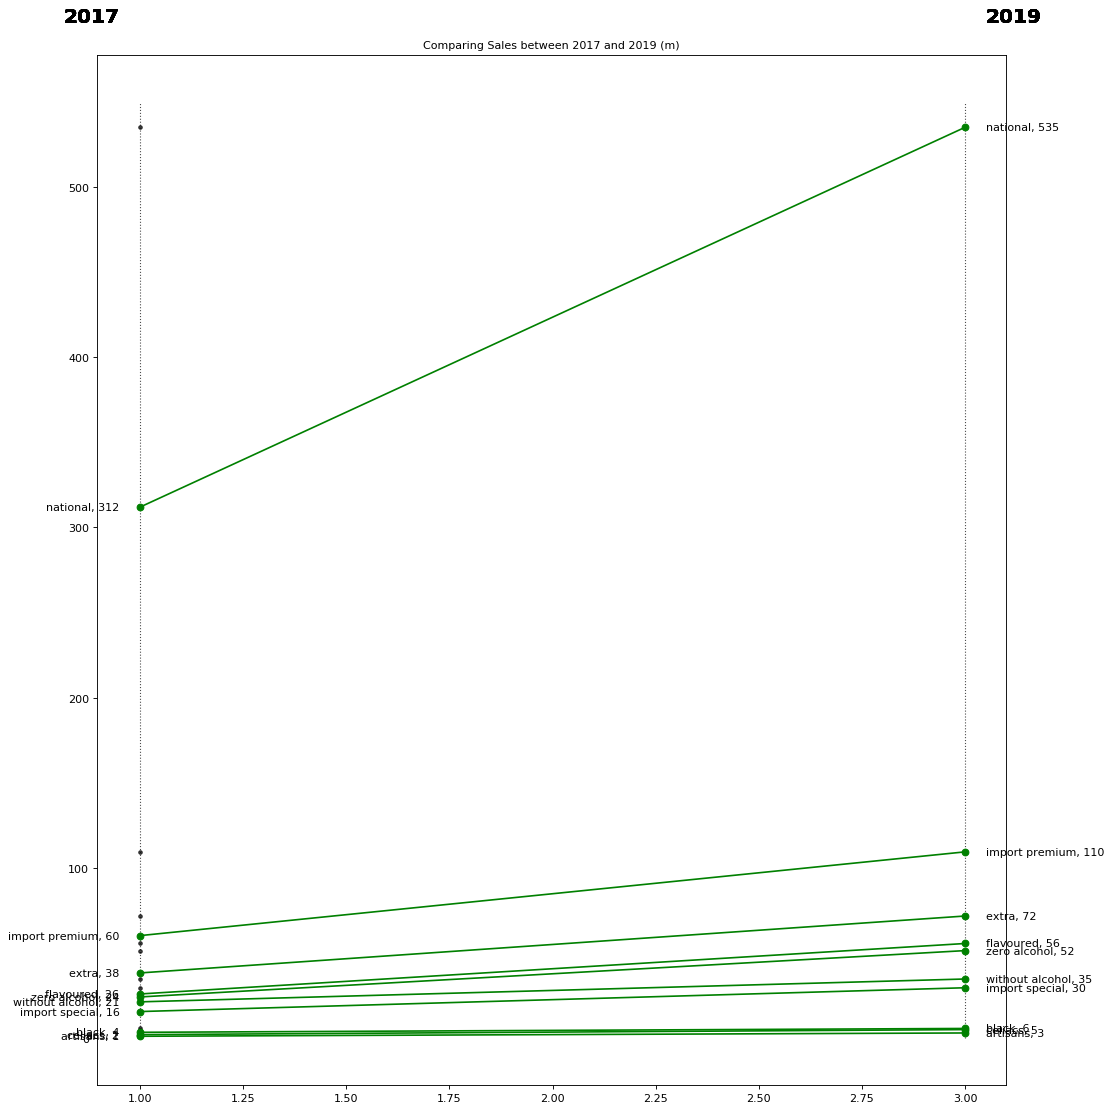

In [142]:
import matplotlib.lines as mlines

with plt.style.context('tableau-colorblind10'):

# Import Data
    df = pd.DataFrame(dataset.loc['2017-08':'2019-08',:].groupby([pd.Grouper(freq='Y'), 'segment'])['ventas_valor'].sum())/1000000

    left_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df.index, df.loc['2019','ventas_valor'])]
    right_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df.index, df.loc['2017','ventas_valor'])]
    klass = ['red' if (y1-y2) < 0 else 'green' for y1, y2 in zip(df.loc['2017','ventas_valor'], df.loc['2019','ventas_valor'])]

# draw line
    def newline(p1, p2, color='black'):
        ax = plt.gca()
        l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='red' if p1[1]-p2[1] > 0 else 'green', marker='o', markersize=6)
        ax.add_line(l)
        return l

    fig, ax = plt.subplots(1,1,figsize=(14,14), dpi= 80)

# Vertical Lines
    ax.vlines(x=1, ymin=0, ymax=550, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
    ax.vlines(x=3, ymin=0, ymax=550, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
    ax.scatter(y=df.loc['2017','ventas_valor'], x=np.repeat(1, df.loc['2019','ventas_valor'].shape), s=10, color='black', alpha=0.7)
    ax.scatter(y=df.loc['2019','ventas_valor'], x=np.repeat(1, df.loc['2017','ventas_valor'].shape), s=10, color='black', alpha=0.7)

# Line Segmentsand Annotation
    for p1, p2, c in zip(df.loc['2017','ventas_valor'], df.loc['2019','ventas_valor'],df.reset_index('segment')['segment'].values):
        newline([1,p1], [3,p2])
        ax.text(1-0.05, p1, c + ', ' + str(round(p1)), horizontalalignment='right', verticalalignment='center', fontdict={'size':10})
        ax.text(3+0.05, p2, c + ', ' + str(round(p2)), horizontalalignment='left', verticalalignment='center', fontdict={'size':10})

# 'Before' and 'After' Annotations
        ax.text(1-0.05, 600, '2017', horizontalalignment='right', verticalalignment='center', fontdict={'size':18, 'weight':700})
        ax.text(3+0.05, 600, '2019', horizontalalignment='left', verticalalignment='center', fontdict={'size':18, 'weight':700})

# Decoration
        ax.set_title("Comparing Sales between 2017 and 2019 (m)", fontdict={'size':10})
        plt.tight_layout()
        plt.savefig('segments')

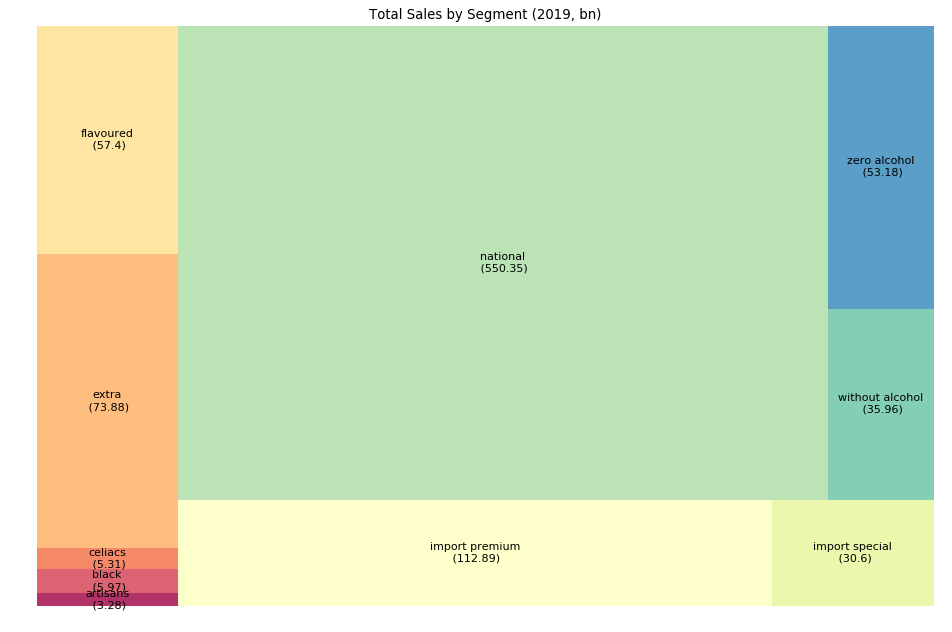

In [326]:
import squarify 

with plt.style.context('tableau-colorblind10'):

# Prepare Data
    df = (round(dataset.loc['2019',:].groupby('segment')['ventas_valor'].sum()/1000000,2)).reset_index(name='ventas_valor')
    labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
    sizes = (df['ventas_valor'].values.tolist())
    colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
    plt.figure(figsize=(12,8), dpi= 80)
    squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
    plt.title('Total Sales by Segment (2019, bn)')
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('segment_manufacturer.png')
    plt.show()

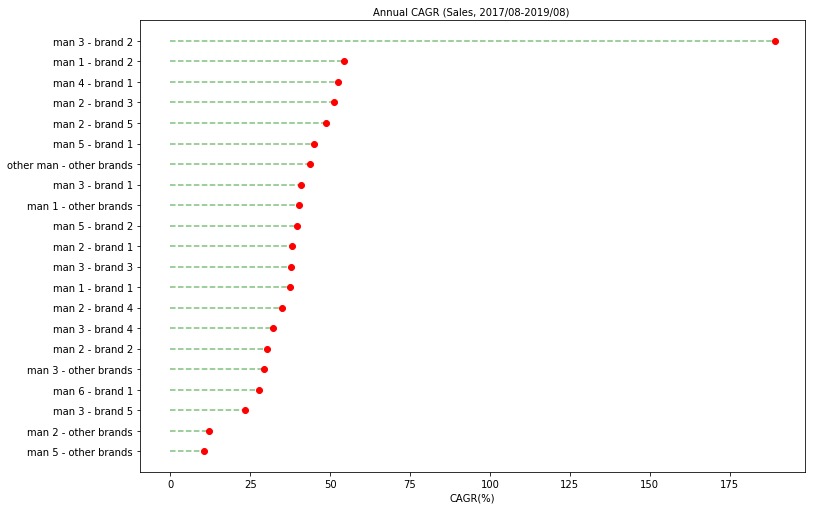

In [59]:
with plt.style.context('tableau-colorblind10'):

# Prepare Data

    compound_sales_growth = pd.DataFrame(dataset.loc['2017-08':'2019',:].groupby([pd.Grouper(freq='Y'), 'brand'])['ventas_valor'].sum()).unstack().T.reset_index('brand')
    compound_sales_growth.index = compound_sales_growth['brand']
    cagr = ((((compound_sales_growth.iloc[:,3] / compound_sales_growth.iloc[:,1])) ** (1/(2019-2017))) - 1)*100

# Plot
    plt.figure(figsize=(10,7))
    ordered_df = cagr.sort_values(ascending=True)
    my_range=range(1,len(ordered_df.index)+1)
    plt.hlines(y=my_range, xmin=0, xmax=ordered_df, color='green',linestyles='dashed',alpha=0.5)
    plt.plot(ordered_df, my_range, "o", color='red' )

#     
    plt.title('Annual CAGR (Sales, 2017/08-2019/08) ',fontsize=10)
    plt.tight_layout()
    plt.yticks(my_range, ordered_df.index)
    plt.xlabel('CAGR(%)')
    plt.show()    

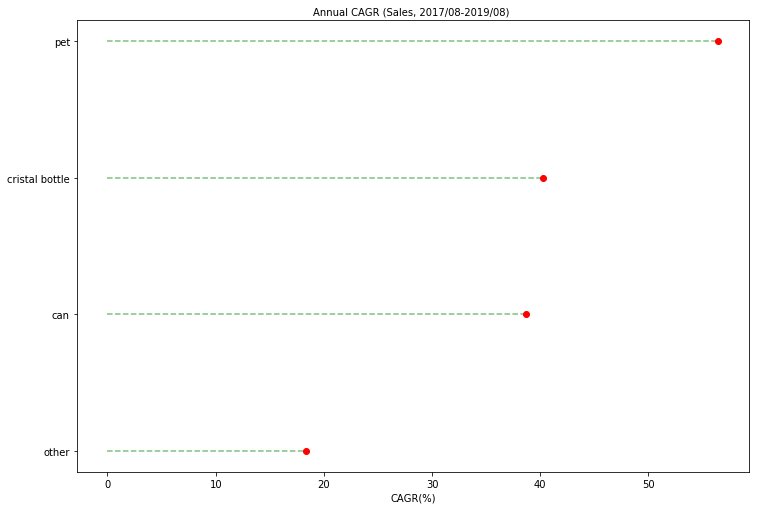

In [205]:
with plt.style.context('tableau-colorblind10'):

# Prepare Data

    compound_sales_growth = pd.DataFrame(dataset.loc['2017-08':'2019-08',:].groupby([pd.Grouper(freq='Y'), 'packaging'])['ventas_valor'].sum()).unstack().T.reset_index('packaging')
    compound_sales_growth.index = compound_sales_growth['packaging']
    cagr = ((((compound_sales_growth.iloc[:,3] / compound_sales_growth.iloc[:,1])) ** (1/(2019-2017))) - 1)*100

# Plot
    plt.figure(figsize=(10,7))
    ordered_df = cagr.sort_values(ascending=True)
    my_range=range(1,len(ordered_df.index)+1)
    plt.hlines(y=my_range, xmin=0, xmax=ordered_df, color='green',linestyles='dashed',alpha=0.5)
    plt.plot(ordered_df, my_range, "o", color='red' )

#     
    plt.title('Annual CAGR (Sales, 2017/08-2019/08) ',fontsize=10)
    plt.tight_layout()
    plt.yticks(my_range, ordered_df.index)
    plt.xlabel('CAGR(%)')
    plt.show()    

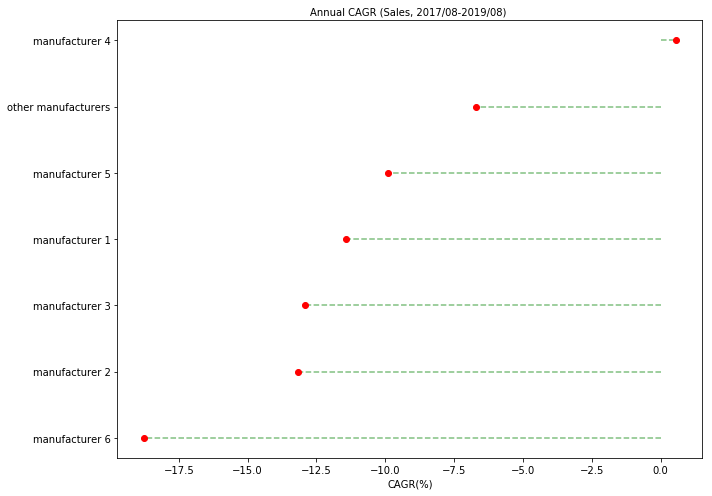

In [64]:
with plt.style.context('tableau-colorblind10'):

# Prepare Data

    compound_sales_growth = pd.DataFrame(dataset.loc['2017':'2019',:].groupby([pd.Grouper(freq='Y'), 'manufacturer'])['ventas_valor'].sum()).unstack().T.reset_index('manufacturer')
    compound_sales_growth.index = compound_sales_growth['manufacturer']
    cagr = ((((compound_sales_growth.iloc[:,3] / compound_sales_growth.iloc[:,1])) ** (1/(2019-2017))) - 1)*100

# Plot
    plt.figure(figsize=(10,7))
    ordered_df = cagr.sort_values(ascending=True)
    my_range=range(1,len(ordered_df.index)+1)
    plt.hlines(y=my_range, xmin=0, xmax=ordered_df, color='green',linestyles='dashed',alpha=0.5)
    plt.plot(ordered_df, my_range, "o", color='red' )

#     
    plt.title('Annual CAGR (Sales, 2017/08-2019/08) ',fontsize=10)
    plt.tight_layout()
    plt.yticks(my_range, ordered_df.index)
    plt.xlabel('CAGR(%)')
    plt.tight_layout()
    plt.savefig('sinresa')
    plt.show()    

In [65]:
compound_sales_growth

cod_semana,manufacturer,2017-12-31 00:00:00,2018-12-31 00:00:00,2019-12-31 00:00:00
manufacturer,,,,
manufacturer 1,manufacturer 1,1.485694e+08,1.550640e+08,1.166014e+08
manufacturer 2,manufacturer 2,2.625473e+08,2.700785e+08,1.979107e+08
manufacturer 3,manufacturer 3,4.126223e+08,4.270597e+08,3.130022e+08
manufacturer 4,manufacturer 4,5.821017e+07,7.187231e+07,5.884259e+07
manufacturer 5,manufacturer 5,2.736460e+07,2.886928e+07,2.221934e+07
manufacturer 6,manufacturer 6,2.800068e+08,2.634641e+08,1.847934e+08
other manufacturers,other manufacturers,4.075637e+07,4.352729e+07,3.547003e+07


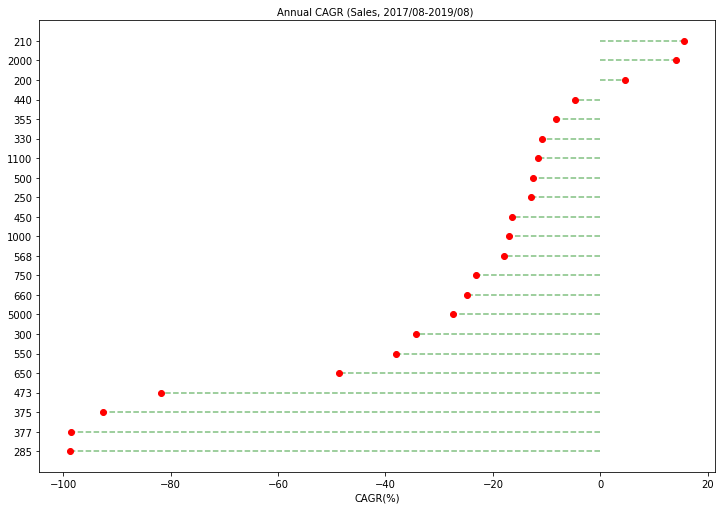

In [62]:
with plt.style.context('tableau-colorblind10'):

# Prepare Data

    compound_sales_growth = pd.DataFrame(dataset.loc['2017':'2019',:].groupby([pd.Grouper(freq='Y'), 'volume'])['ventas_valor'].sum()).unstack().T.reset_index('volume')
    compound_sales_growth.index = compound_sales_growth['volume']
    cagr = ((((compound_sales_growth.iloc[:,3] / compound_sales_growth.iloc[:,1])) ** (1/(2019-2017))) - 1)*100

# Plot
    plt.figure(figsize=(10,7))
    ordered_df = cagr.sort_values(ascending=True).dropna()
    my_range=range(1,len(ordered_df.index)+1)
    plt.hlines(y=my_range, xmin=0, xmax=ordered_df, color='green',linestyles='dashed',alpha=0.5)
    plt.plot(ordered_df, my_range, "o", color='red' )

#     
    plt.title('Annual CAGR (Sales, 2017/08-2019/08) ',fontsize=10)
    plt.tight_layout()
    plt.yticks(my_range, ordered_df.index)
    plt.xlabel('CAGR(%)')
    plt.show()    

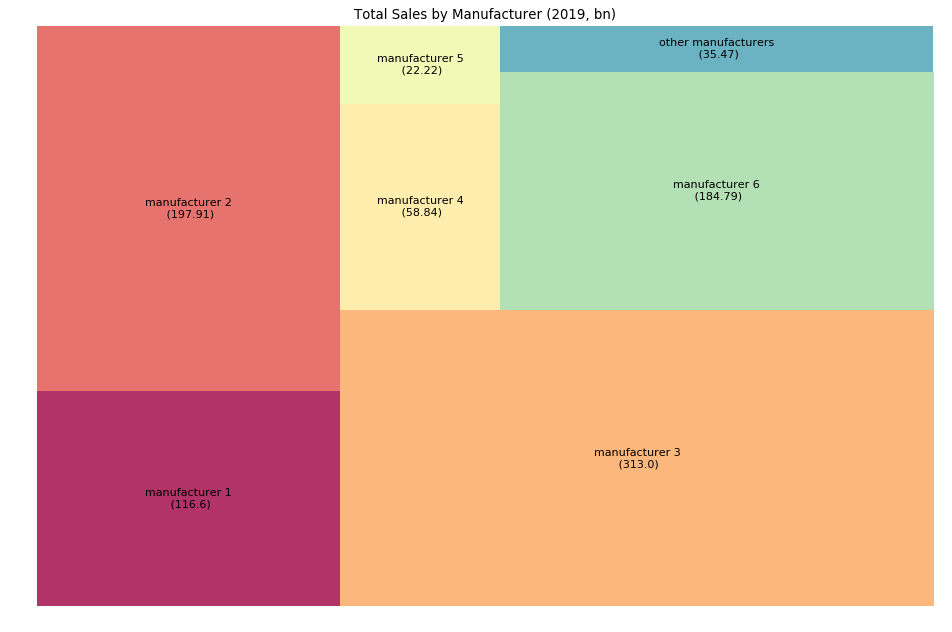

In [106]:
import squarify 

with plt.style.context('tableau-colorblind10'):


# Prepare Data
    df = (round(dataset.loc['2019',:].groupby('manufacturer')['ventas_valor'].sum()/1000000,2)).reset_index(name='ventas_valor')
    labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
    sizes = (df['ventas_valor'].values.tolist())
    colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
    plt.figure(figsize=(12,8), dpi= 80)
    squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
    plt.title('Total Sales by Manufacturer (2019, bn)')
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('sales_manufacturer.png')
    plt.show()

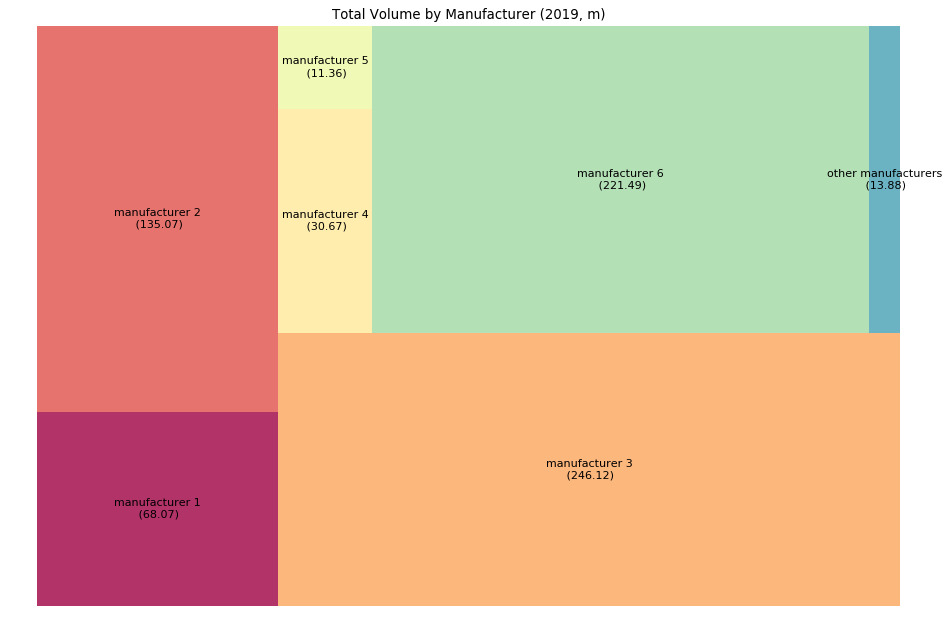

In [397]:
with plt.style.context('tableau-colorblind10'):


# Prepare Data
    df = (round(dataset.loc['2019',:].groupby('manufacturer')['ventas_volumen'].sum()/1000000,2)).reset_index(name='ventas_volumen')
    labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
    sizes = (df['ventas_volumen'].values.tolist())
    colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
    plt.figure(figsize=(12,8), dpi= 80)
    squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
    plt.title('Total Volume by Manufacturer (2019, m)')
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('volume_manufacturer.png')
    plt.show()

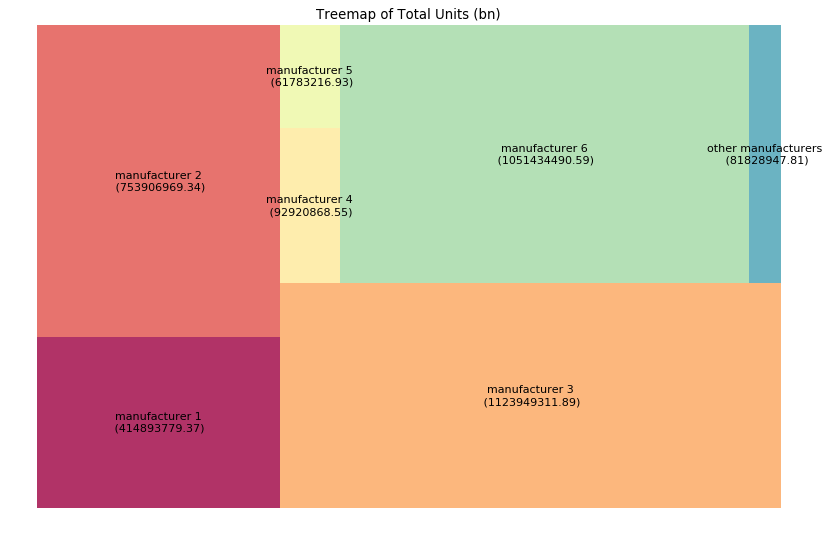

In [275]:
with plt.style.context('tableau-colorblind10'):


# Prepare Data
    df = (round(dataset.groupby('manufacturer')['ventas_unidades'].sum(),2)).reset_index(name='ventas_unidades')
    labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
    sizes = (df['ventas_unidades'].values.tolist())
    colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
    plt.figure(figsize=(12,8), dpi= 80)
    squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
    plt.title('Treemap of Total Units (bn)')
    plt.axis('off')
    plt.show()

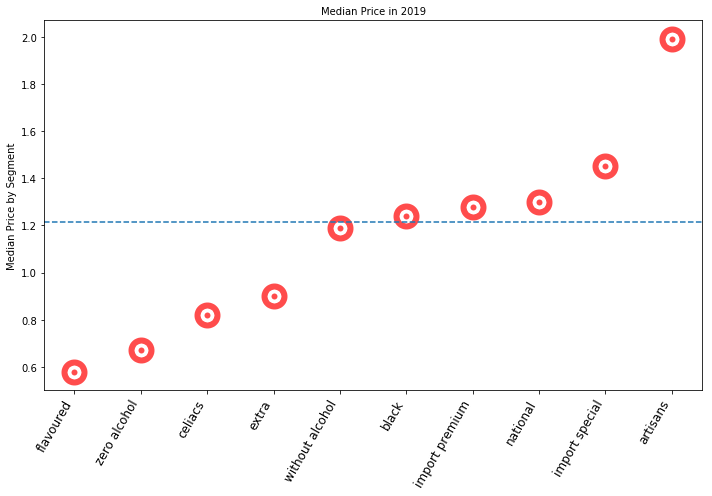

In [107]:
# Discount Leaders

with plt.style.context('tableau-colorblind10'):

# Prepare Data
    df = dataset.loc['2019',:][['precio_real_unidades', 'segment']].groupby('segment').median()
    df.sort_values('precio_real_unidades', inplace=True)
    df.reset_index(inplace=True)
    y_median = df['precio_real_unidades'].median()

# Plot
    plt.figure(figsize=(10,7))
    plt.scatter(x=df.index, y=df.precio_real_unidades, color='red', alpha=0.7, linewidth=20)
    plt.axhline(y_median, linestyle='dashed')
    
# Decoration
    plt.title('Median Price in 2019', fontsize=10)
    plt.ylabel('Median Price by Segment')
    plt.xticks(df.index, df.segment, rotation=60, horizontalalignment='right', fontsize=12)
    plt.tight_layout()
    plt.savefig('median_segment.png')

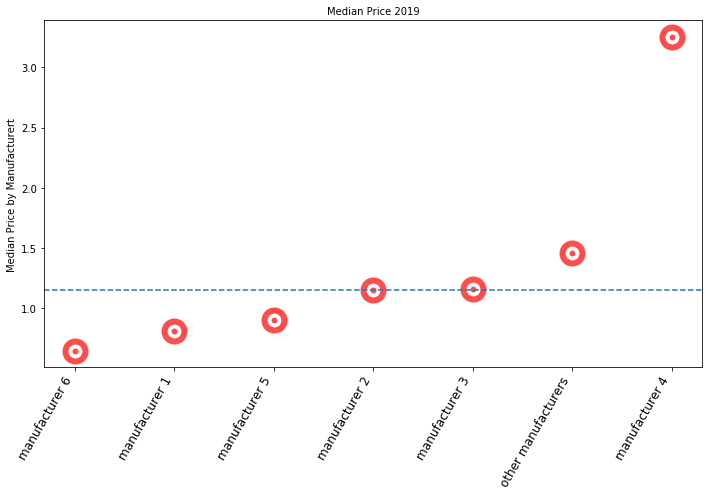

In [108]:
# Discount Leaders

with plt.style.context('tableau-colorblind10'):

# Prepare Data
    df = dataset.loc['2019',:][['precio_real_unidades', 'manufacturer']].groupby('manufacturer').median()
    df.sort_values('precio_real_unidades', inplace=True)
    df.reset_index(inplace=True)
    y_median = df['precio_real_unidades'].median()

# Plot
    plt.figure(figsize=(10,7))
    plt.scatter(x=df.index, y=df.precio_real_unidades, color='red', alpha=0.7, linewidth=20)
    plt.axhline(y_median, linestyle='dashed')

# Decoration
    plt.title('Median Price 2019', fontsize=10)
    plt.ylabel('Median Price by Manufacturert')
    plt.xticks(df.index, df.manufacturer, rotation=60, horizontalalignment='right', fontsize=12)
    plt.tight_layout()
    plt.savefig('median_manufac.png')

#### LEADERS

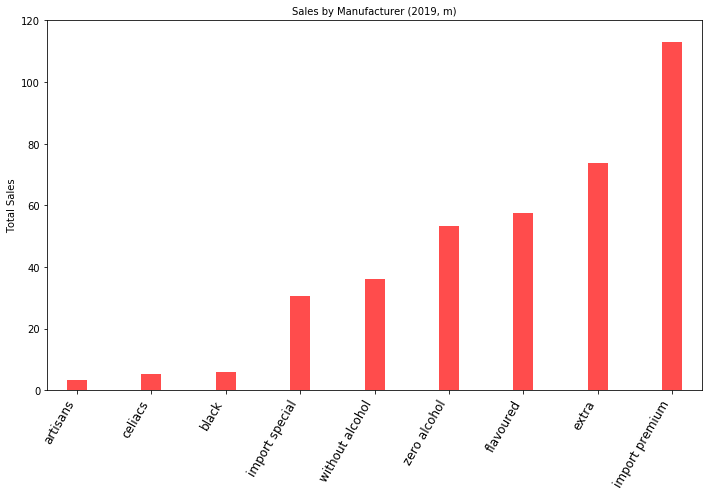

In [110]:
# Unit Leaders

with plt.style.context('tableau-colorblind10'):

# Prepare Data
    df = dataset[dataset['segment']!='national'].loc['2019'][['ventas_valor', 'segment']].groupby('segment').sum() /1000000
    df.sort_values('ventas_valor', inplace=True)
    df.reset_index(inplace=True)

# Plot
    plt.figure(figsize=(10,7))
    plt.vlines(x=df.index, ymin=0, ymax=df.ventas_valor, color='red', alpha=0.7, linewidth=20)

# Decoration
    plt.title('Sales by Manufacturer (2019, m)', fontsize=10)
    plt.ylabel('Total Sales')
    plt.xticks(df.index, df.segment, rotation=60, horizontalalignment='right', fontsize=12)
    plt.ylim((0,120))
    plt.tight_layout()
    plt.savefig('total_non_national')


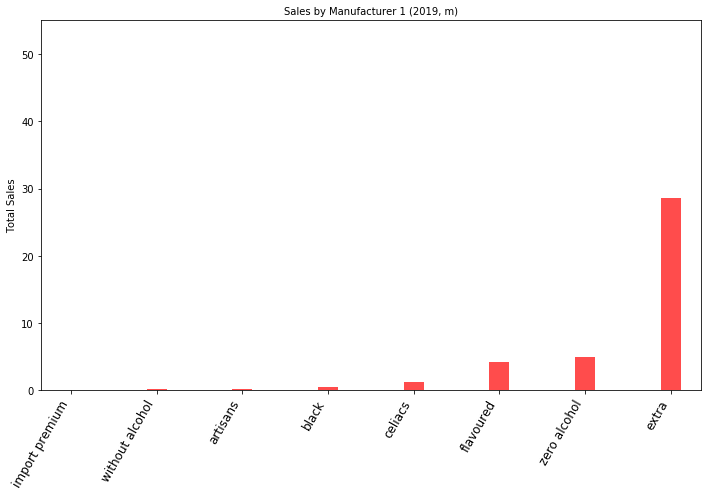

In [111]:
# Unit Leaders

with plt.style.context('tableau-colorblind10'):

# Prepare Data
    df = dataset[(dataset['segment']!='national') & (dataset['manufacturer'] == 'manufacturer 1')].loc['2019'][['ventas_valor', 'segment']].groupby('segment').sum() /1000000
    df.sort_values('ventas_valor', inplace=True)
    df.reset_index(inplace=True)

# Plot
    plt.figure(figsize=(10,7))
    plt.vlines(x=df.index, ymin=0, ymax=df.ventas_valor, color='red', alpha=0.7, linewidth=20)

# Decoration
    plt.title('Sales by Manufacturer 1 (2019, m)', fontsize=10)
    plt.ylabel('Total Sales')
    plt.xticks(df.index, df.segment, rotation=60, horizontalalignment='right', fontsize=12)
    plt.ylim((0,55))
    plt.tight_layout()
    plt.savefig('manufacturer_1')


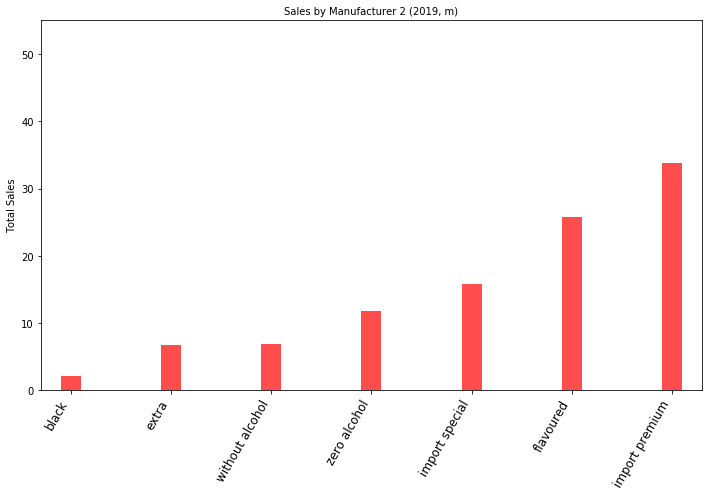

In [112]:
# Unit Leaders

with plt.style.context('tableau-colorblind10'):

# Prepare Data
    df = dataset[(dataset['segment']!='national') & (dataset['manufacturer'] == 'manufacturer 2')].loc['2019'][['ventas_valor', 'segment']].groupby('segment').sum() /1000000
    df.sort_values('ventas_valor', inplace=True)
    df.reset_index(inplace=True)

# Plot
    plt.figure(figsize=(10,7))
    plt.vlines(x=df.index, ymin=0, ymax=df.ventas_valor, color='red', alpha=0.7, linewidth=20)

# Decoration
    plt.title('Sales by Manufacturer 2 (2019, m)', fontsize=10)
    plt.ylabel('Total Sales')
    plt.xticks(df.index, df.segment, rotation=60, horizontalalignment='right', fontsize=12)
    plt.ylim((0,55))
    plt.tight_layout()
    plt.savefig('manufacturer_2')


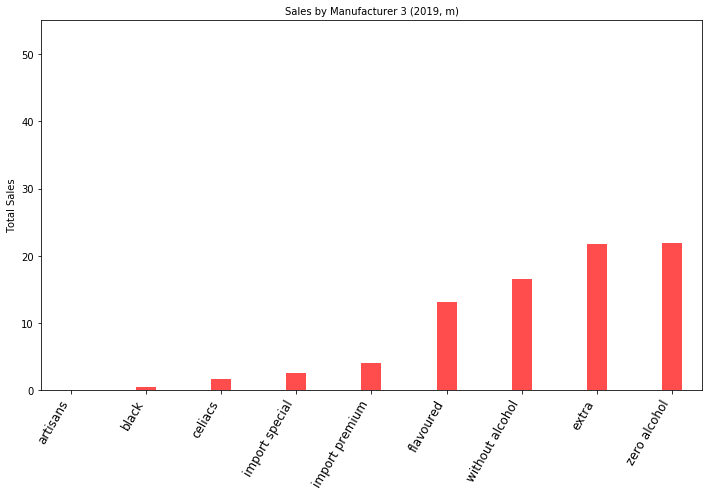

In [113]:
# Unit Leaders

with plt.style.context('tableau-colorblind10'):

# Prepare Data
    df = dataset[(dataset['segment']!='national') & (dataset['manufacturer'] == 'manufacturer 3')].loc['2019'][['ventas_valor', 'segment']].groupby('segment').sum() /1000000
    df.sort_values('ventas_valor', inplace=True)
    df.reset_index(inplace=True)

# Plot
    plt.figure(figsize=(10,7))
    plt.vlines(x=df.index, ymin=0, ymax=df.ventas_valor, color='red', alpha=0.7, linewidth=20)

# Decoration
    plt.title('Sales by Manufacturer 3 (2019, m)', fontsize=10)
    plt.ylabel('Total Sales')
    plt.xticks(df.index, df.segment, rotation=60, horizontalalignment='right', fontsize=12)
    plt.ylim((0,55))
    plt.tight_layout()
    plt.savefig('manufacturer_3')


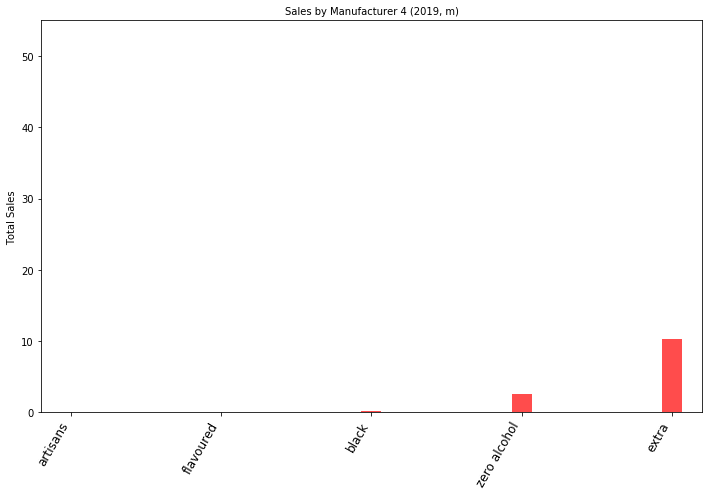

In [114]:
# Unit Leaders

with plt.style.context('tableau-colorblind10'):

# Prepare Data
    df = dataset[(dataset['segment']!='national') & (dataset['manufacturer'] == 'manufacturer 4')].loc['2019'][['ventas_valor', 'segment']].groupby('segment').sum() /1000000
    df.sort_values('ventas_valor', inplace=True)
    df.reset_index(inplace=True)

# Plot
    plt.figure(figsize=(10,7))
    plt.vlines(x=df.index, ymin=0, ymax=df.ventas_valor, color='red', alpha=0.7, linewidth=20)

# Decoration
    plt.title('Sales by Manufacturer 4 (2019, m)', fontsize=10)
    plt.ylabel('Total Sales')
    plt.xticks(df.index, df.segment, rotation=60, horizontalalignment='right', fontsize=12)
    plt.ylim((0,55))
    plt.tight_layout()
    plt.savefig('manufacturer_4')


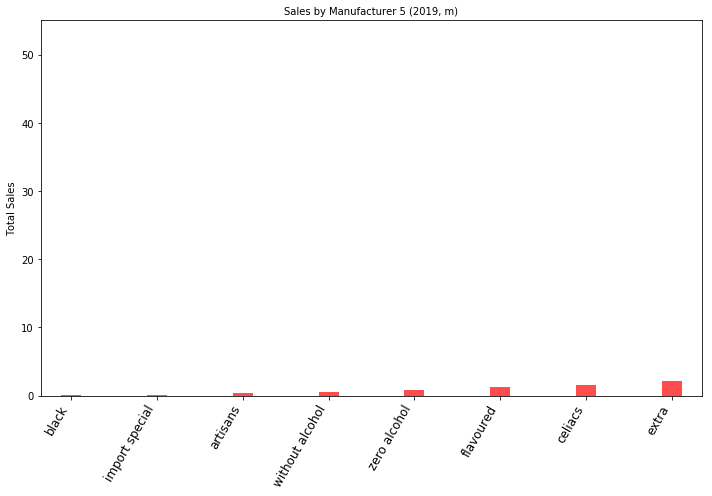

In [115]:
# Unit Leaders

with plt.style.context('tableau-colorblind10'):

# Prepare Data
    df = dataset[(dataset['segment']!='national') & (dataset['manufacturer'] == 'manufacturer 5')].loc['2019'][['ventas_valor', 'segment']].groupby('segment').sum() /1000000
    df.sort_values('ventas_valor', inplace=True)
    df.reset_index(inplace=True)

# Plot
    plt.figure(figsize=(10,7))
    plt.vlines(x=df.index, ymin=0, ymax=df.ventas_valor, color='red', alpha=0.7, linewidth=20)

# Decoration
    plt.title('Sales by Manufacturer 5 (2019, m)', fontsize=10)
    plt.ylabel('Total Sales')
    plt.xticks(df.index, df.segment, rotation=60, horizontalalignment='right', fontsize=12)
    plt.ylim((0,55))
    plt.tight_layout()
    plt.savefig('manufacturer_5')


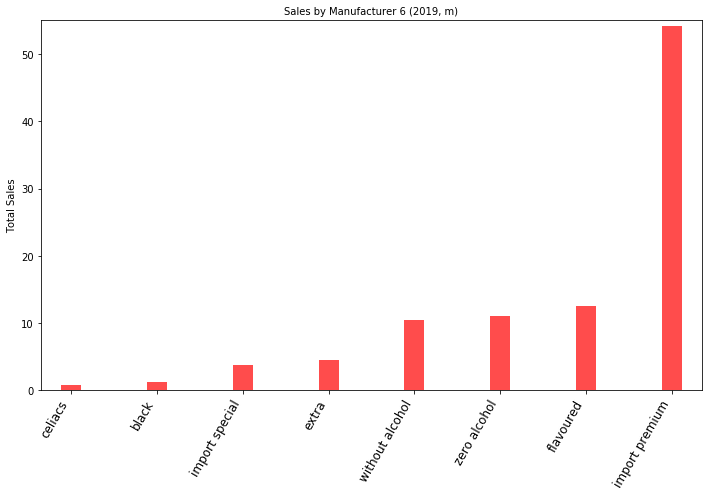

In [116]:
# Unit Leaders

with plt.style.context('tableau-colorblind10'):

# Prepare Data
    df = dataset[(dataset['segment']!='national') & (dataset['manufacturer'] == 'manufacturer 6')].loc['2019'][['ventas_valor', 'segment']].groupby('segment').sum() /1000000
    df.sort_values('ventas_valor', inplace=True)
    df.reset_index(inplace=True)

# Plot
    plt.figure(figsize=(10,7))
    plt.vlines(x=df.index, ymin=0, ymax=df.ventas_valor, color='red', alpha=0.7, linewidth=20)

# Decoration
    plt.title('Sales by Manufacturer 6 (2019, m)', fontsize=10)
    plt.ylabel('Total Sales')
    plt.xticks(df.index, df.segment, rotation=60, horizontalalignment='right', fontsize=12)
    plt.ylim((0,55))
    plt.tight_layout()
    plt.savefig('manufacturer_6')


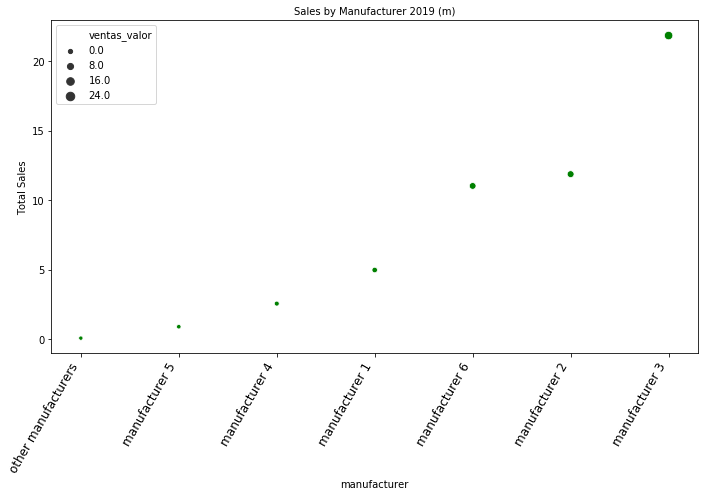

In [117]:
with plt.style.context('tableau-colorblind10'):

# Prepare Data
    df = dataset[(dataset['segment']=='zero alcohol')].loc['2019'][['ventas_valor', 'manufacturer']].groupby('manufacturer').sum()/1000000
    df = df.reset_index()
    df = df.sort_values('ventas_valor',ascending=True)

    plt.figure(figsize=(10,7))
    sns.scatterplot(x='manufacturer',y='ventas_valor',size='ventas_valor',data=df,color='green')

# Decoration
    plt.title('Sales by Manufacturer 2019 (m)', fontsize=10)
    plt.ylabel('Total Sales')
    plt.xticks(df.manufacturer, df.manufacturer, rotation=60, horizontalalignment='right', fontsize=12)
    plt.tight_layout()
    plt.savefig('zero_alcohol')

In [118]:
df.sum()

manufacturer    other manufacturersmanufacturer 5manufacturer ...
ventas_valor                                              53.1811
dtype: object

In [120]:
dataset.columns

Index(['cod_tienda', 'cod_producto', 'ventas_unidades', 'ventas_valor',
       'ventas_volumen', 'numero_referencias', 'precio_real_unidades',
       'precio_real_volumen', 'precio_tarifa_unidades',
       'precio_tarifa_volumen', 'val', 'factor_extrapolacion', 'category',
       'segment', 'manufacturer', 'brand', 'packaging', 'volume', 'units',
       'cod_canal', 'cod_provincia', 'postal_code', 'sales_surface_sqmeters',
       'provincia', 'comunidad autónoma', 'temp_minima', 'temp_maxima',
       'temp_media', 'precipitacion', 'Total', 'Promo descuento',
       'Promo expositor', 'Promo extra cantidad', 'Promo folleto',
       'Promo multicompra', 'Promo isla', 'Promo regalo', 'Promo cabecera'],
      dtype='object')

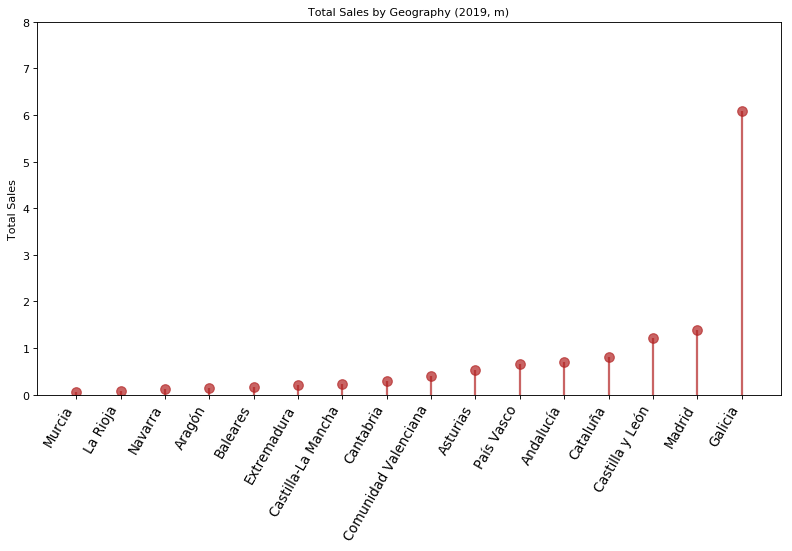

In [136]:
with plt.style.context('tableau-colorblind10'):


# Prepare Data
    df = dataset[(dataset['segment']!='national') & (dataset['manufacturer'] == 'manufacturer 4')].loc['2019'][['ventas_valor', 'comunidad autónoma']].groupby('comunidad autónoma').sum() /1000000
    df.sort_values('ventas_valor', inplace=True)
    df.reset_index(inplace=True)

# Draw plot
    fig, ax = plt.subplots(figsize=(10,7), dpi= 80)
    ax.vlines(x=df.index, ymin=0, ymax=df.ventas_valor, color='firebrick', alpha=0.7, linewidth=2)
    ax.scatter(x=df.index, y=df.ventas_valor, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
    ax.set_title('Total Sales by Geography (2019, m)', fontdict={'size':10})
    ax.set_ylabel('Total Sales')
    ax.set_xticks(df.index)
    ax.set_xticklabels(df['comunidad autónoma'], rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
    ax.set_ylim(0, 8)
    plt.tight_layout()
    plt.savefig('man_4_geography')

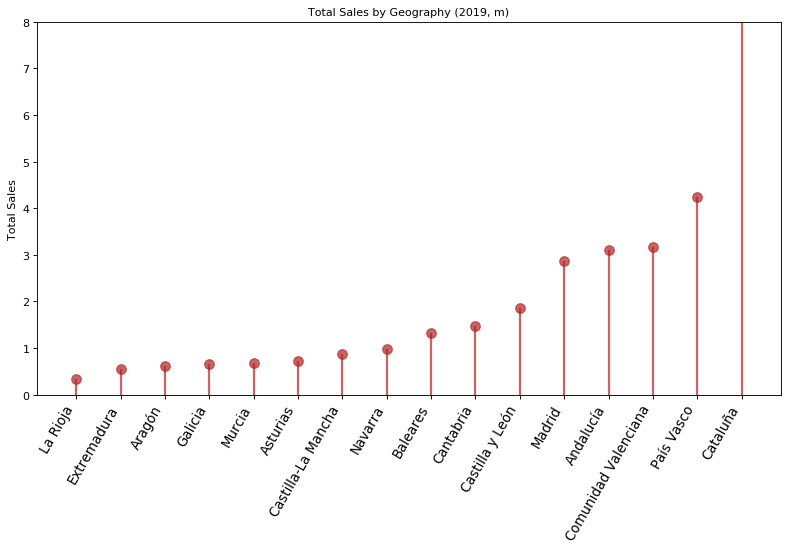

In [346]:
with plt.style.context('tableau-colorblind10'):


# Prepare Data
    df = dataset[(dataset['segment']!='national') & (dataset['manufacturer'] == 'manufacturer 1')].loc['2019'][['ventas_valor', 'comunidad autónoma']].groupby('comunidad autónoma').sum() /1000000
    df.sort_values('ventas_valor', inplace=True)
    df.reset_index(inplace=True)

# Draw plot
    fig, ax = plt.subplots(figsize=(10,7), dpi= 80)
    ax.vlines(x=df.index, ymin=0, ymax=df.ventas_valor, color='firebrick', alpha=0.7, linewidth=2)
    ax.scatter(x=df.index, y=df.ventas_valor, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
    ax.set_title('Total Sales by Geography (2019, m)', fontdict={'size':10})
    ax.set_ylabel('Total Sales')
    ax.set_xticks(df.index)
    ax.set_xticklabels(df['comunidad autónoma'], rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
    ax.set_ylim(0, 8)
    plt.tight_layout()
    plt.savefig('man_4_geography')

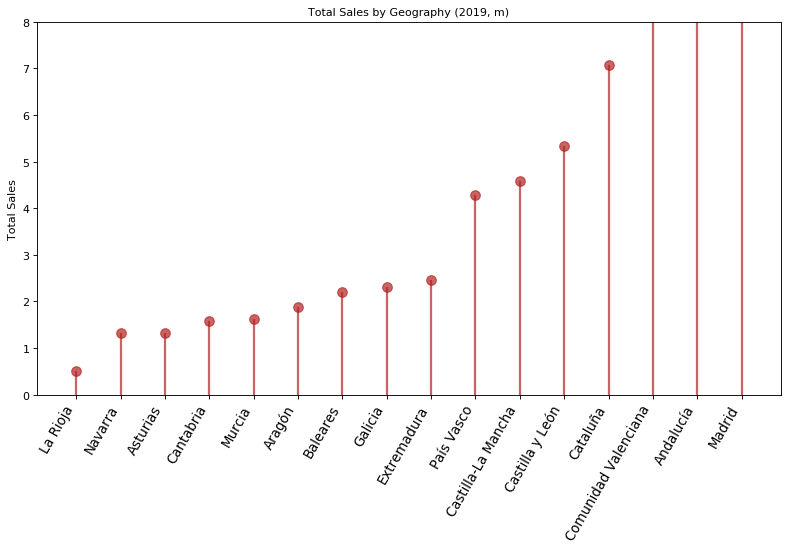

In [347]:
with plt.style.context('tableau-colorblind10'):


# Prepare Data
    df = dataset[(dataset['segment']!='national') & (dataset['manufacturer'] == 'manufacturer 3')].loc['2019'][['ventas_valor', 'comunidad autónoma']].groupby('comunidad autónoma').sum() /1000000
    df.sort_values('ventas_valor', inplace=True)
    df.reset_index(inplace=True)

# Draw plot
    fig, ax = plt.subplots(figsize=(10,7), dpi= 80)
    ax.vlines(x=df.index, ymin=0, ymax=df.ventas_valor, color='firebrick', alpha=0.7, linewidth=2)
    ax.scatter(x=df.index, y=df.ventas_valor, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
    ax.set_title('Total Sales by Geography (2019, m)', fontdict={'size':10})
    ax.set_ylabel('Total Sales')
    ax.set_xticks(df.index)
    ax.set_xticklabels(df['comunidad autónoma'], rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
    ax.set_ylim(0, 8)
    plt.tight_layout()
    plt.savefig('man_4_geography')

#### ZERO ALCOHOL

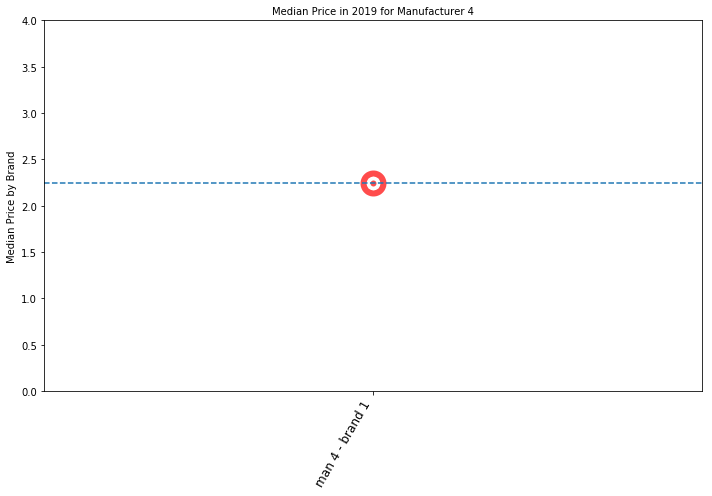

In [213]:
# Discount Leaders

with plt.style.context('tableau-colorblind10'):

# Prepare Data
    df = dataset[(dataset['manufacturer'] == 'manufacturer 4') & (dataset['segment'] == 'zero alcohol')].loc['2019'][['precio_real_unidades', 'brand']].groupby('brand').median()
    df.sort_values('precio_real_unidades', inplace=True)
    df.reset_index(inplace=True)
    y_median = df['precio_real_unidades'].median()

# Plot
    plt.figure(figsize=(10,7))
    plt.scatter(x=df.index, y=df.precio_real_unidades, color='red', alpha=0.7, linewidth=20)
    plt.axhline(y_median, linestyle='dashed')
    
# Decoration
    plt.title('Median Price in 2019 for Manufacturer 4', fontsize=10)
    plt.ylabel('Median Price by Brand')
    plt.xticks(df.index, df.brand, rotation=60, horizontalalignment='right', fontsize=12)
    plt.ylim(0,4)
    plt.tight_layout()
    plt.savefig('median_segment_MAN4.png')

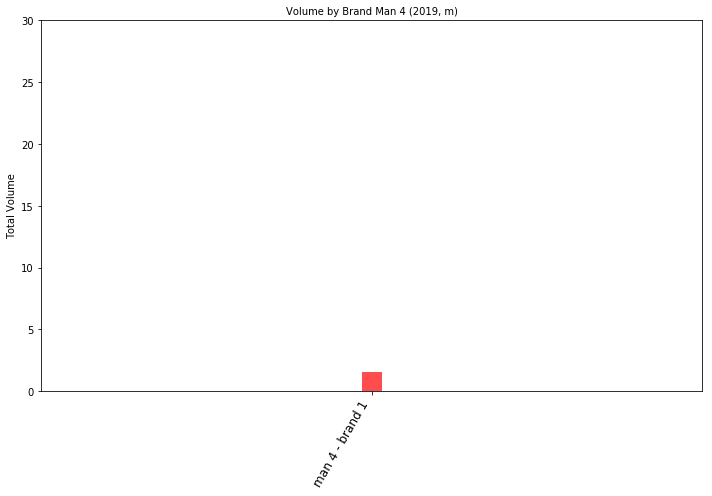

In [220]:
# Unit Leaders

with plt.style.context('tableau-colorblind10'):

# Prepare Data
    df =dataset[(dataset['manufacturer'] == 'manufacturer 4') & (dataset['segment'] == 'zero alcohol')].loc['2019'][['ventas_volumen', 'brand']].groupby('brand').sum() /1000000
    df.sort_values('ventas_volumen', inplace=True)
    df.reset_index(inplace=True)

# Plot
    plt.figure(figsize=(10,7))
    plt.vlines(x=df.index, ymin=0, ymax=df.ventas_volumen, color='red', alpha=0.7, linewidth=20)

# Decoration
    plt.title('Volume by Brand Man 4 (2019, m)', fontsize=10)
    plt.ylabel('Total Volume')
    plt.xticks(df.index, df.brand, rotation=60, horizontalalignment='right', fontsize=12)
    plt.ylim((0,30))
    plt.tight_layout()
    plt.savefig('vol_man_4')


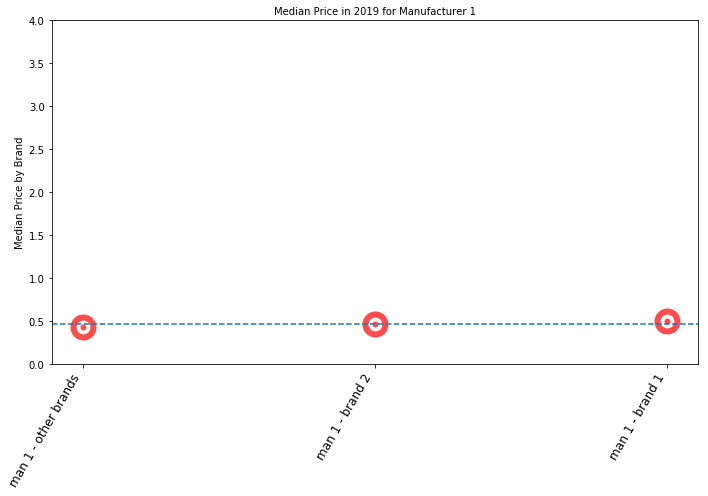

In [215]:
# Discount Leaders

with plt.style.context('tableau-colorblind10'):

# Prepare Data
    df = dataset[(dataset['manufacturer'] == 'manufacturer 1') & (dataset['segment'] == 'zero alcohol')].loc['2019'][['precio_real_unidades', 'brand']].groupby('brand').median()
    df.sort_values('precio_real_unidades', inplace=True)
    df.reset_index(inplace=True)
    y_median = df['precio_real_unidades'].median()

# Plot
    plt.figure(figsize=(10,7))
    plt.scatter(x=df.index, y=df.precio_real_unidades, color='red', alpha=0.7, linewidth=20)
    plt.axhline(y_median, linestyle='dashed')
    
# Decoration
    plt.title('Median Price in 2019 for Manufacturer 1', fontsize=10)
    plt.ylabel('Median Price by Brand')
    plt.xticks(df.index, df.brand, rotation=60, horizontalalignment='right', fontsize=12)
    plt.ylim(0,4)
    plt.tight_layout()
    plt.savefig('median_segment_MAN1.png')

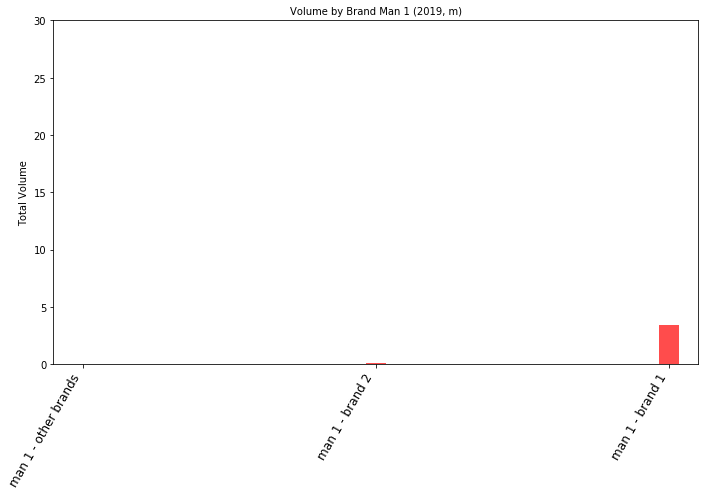

In [223]:
# Unit Leaders

with plt.style.context('tableau-colorblind10'):

# Prepare Data
    df =dataset[(dataset['manufacturer'] == 'manufacturer 1') & (dataset['segment'] == 'zero alcohol')].loc['2019'][['ventas_volumen', 'brand']].groupby('brand').sum() /1000000
    df.sort_values('ventas_volumen', inplace=True)
    df.reset_index(inplace=True)

# Plot
    plt.figure(figsize=(10,7))
    plt.vlines(x=df.index, ymin=0, ymax=df.ventas_volumen, color='red', alpha=0.7, linewidth=20)

# Decoration
    plt.title('Volume by Brand Man 1 (2019, m)', fontsize=10)
    plt.ylabel('Total Volume')
    plt.xticks(df.index, df.brand, rotation=60, horizontalalignment='right', fontsize=12)
    plt.ylim((0,30))
    plt.tight_layout()
    plt.savefig('vol_man_1')


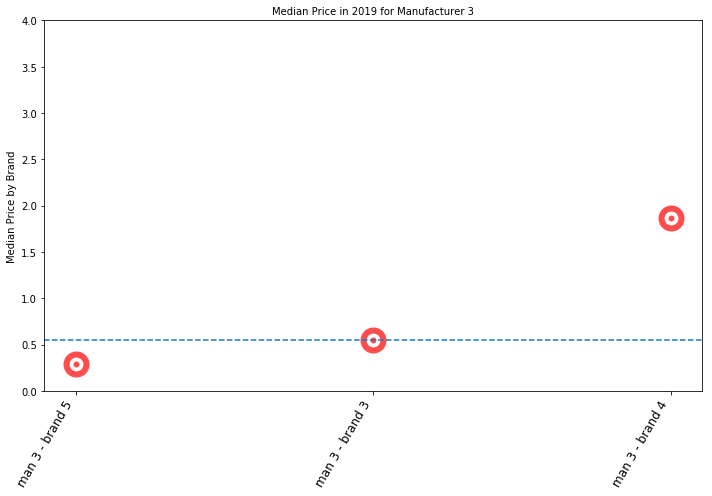

In [225]:
# Discount Leaders

with plt.style.context('tableau-colorblind10'):

# Prepare Data
    df = dataset[(dataset['manufacturer'] == 'manufacturer 3') & (dataset['segment'] == 'zero alcohol')].loc['2019'][['precio_real_unidades', 'brand']].groupby('brand').median()
    df.sort_values('precio_real_unidades', inplace=True)
    df.reset_index(inplace=True)
    y_median = df['precio_real_unidades'].median()

# Plot
    plt.figure(figsize=(10,7))
    plt.scatter(x=df.index, y=df.precio_real_unidades, color='red', alpha=0.7, linewidth=20)
    plt.axhline(y_median, linestyle='dashed')
    
# Decoration
    plt.title('Median Price in 2019 for Manufacturer 3', fontsize=10)
    plt.ylabel('Median Price by Brand')
    plt.xticks(df.index, df.brand, rotation=60, horizontalalignment='right', fontsize=12)
    plt.ylim(0,4)
    plt.tight_layout()
    plt.savefig('median_segment_MAN3.png')

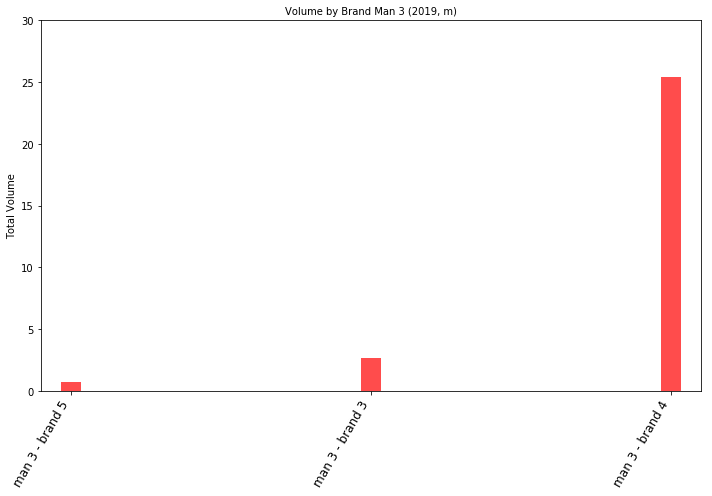

In [222]:
# Unit Leaders

with plt.style.context('tableau-colorblind10'):

# Prepare Data
    df =dataset[(dataset['manufacturer'] == 'manufacturer 3') & (dataset['segment'] == 'zero alcohol')].loc['2019'][['ventas_volumen', 'brand']].groupby('brand').sum() /1000000
    df.sort_values('ventas_volumen', inplace=True)
    df.reset_index(inplace=True)

# Plot
    plt.figure(figsize=(10,7))
    plt.vlines(x=df.index, ymin=0, ymax=df.ventas_volumen, color='red', alpha=0.7, linewidth=20)

# Decoration
    plt.title('Volume by Brand Man 3 (2019, m)', fontsize=10)
    plt.ylabel('Total Volume')
    plt.xticks(df.index, df.brand, rotation=60, horizontalalignment='right', fontsize=12)
    plt.ylim((0,30))
    plt.tight_layout()
    plt.savefig('vol_man_3')


#### EXTRA

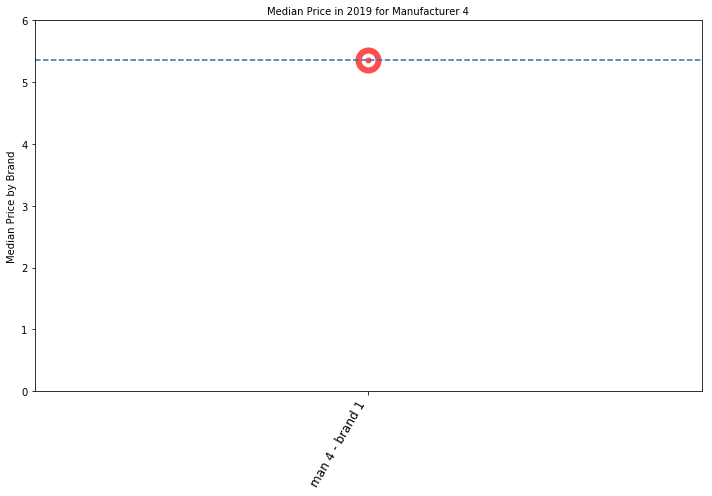

In [242]:
# Discount Leaders

with plt.style.context('tableau-colorblind10'):

# Prepare Data
    df = dataset[(dataset['manufacturer'] == 'manufacturer 4') & (dataset['segment'] == 'extra')].loc['2019'][['precio_real_unidades', 'brand']].groupby('brand').median()
    df.sort_values('precio_real_unidades', inplace=True)
    df.reset_index(inplace=True)
    y_median = df['precio_real_unidades'].median()

# Plot
    plt.figure(figsize=(10,7))
    plt.scatter(x=df.index, y=df.precio_real_unidades, color='red', alpha=0.7, linewidth=20)
    plt.axhline(y_median, linestyle='dashed')
    
# Decoration
    plt.title('Median Price in 2019 for Manufacturer 4', fontsize=10)
    plt.ylabel('Median Price by Brand')
    plt.xticks(df.index, df.brand, rotation=60, horizontalalignment='right', fontsize=12)
    plt.ylim(0,6)
    plt.tight_layout()
    plt.savefig('median_segment_MAN4.png')

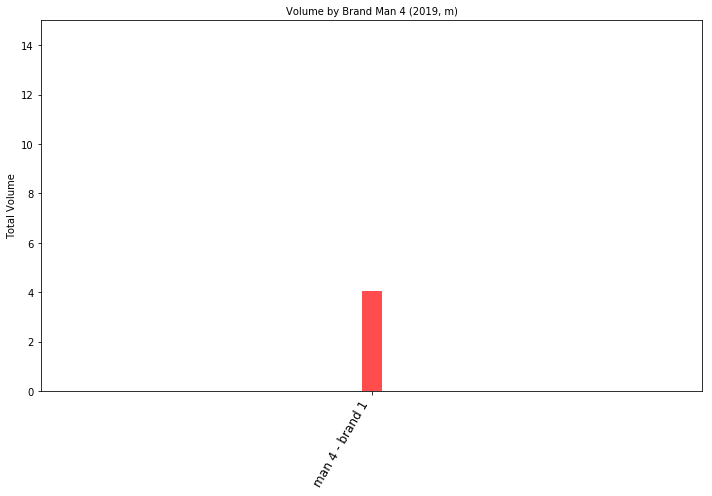

In [246]:
# Unit Leaders

with plt.style.context('tableau-colorblind10'):

# Prepare Data
    df =dataset[(dataset['manufacturer'] == 'manufacturer 4') & (dataset['segment'] == 'extra')].loc['2019'][['ventas_volumen', 'brand']].groupby('brand').sum() /1000000
    df.sort_values('ventas_volumen', inplace=True)
    df.reset_index(inplace=True)

# Plot
    plt.figure(figsize=(10,7))
    plt.vlines(x=df.index, ymin=0, ymax=df.ventas_volumen, color='red', alpha=0.7, linewidth=20)

# Decoration
    plt.title('Volume by Brand Man 4 (2019, m)', fontsize=10)
    plt.ylabel('Total Volume')
    plt.xticks(df.index, df.brand, rotation=60, horizontalalignment='right', fontsize=12)
    plt.ylim((0,15))
    plt.tight_layout()
    plt.savefig('vol_man_4')


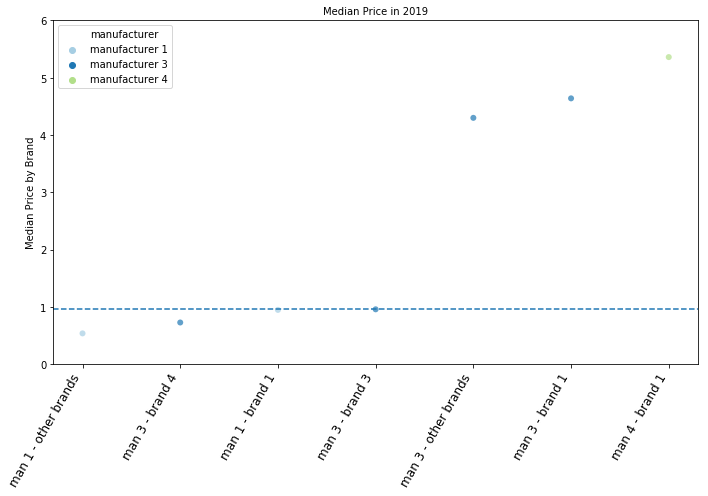

In [383]:
# Discount Leaders

with plt.style.context('tableau-colorblind10'):

# Prepare Data
    df = dataset[(
        (dataset['manufacturer'] == 'manufacturer 1') | (dataset['manufacturer'] == 'manufacturer 3') | (dataset['manufacturer'] == 'manufacturer 4')) 
                 & (dataset['segment'] == 'extra')].loc['2019'][['precio_real_unidades', 'brand','manufacturer']].groupby(['brand','manufacturer']).median()
    df.sort_values('precio_real_unidades', inplace=True)
    df.reset_index(inplace=True)
    y_median = df['precio_real_unidades'].median()

# Plot
    plt.figure(figsize=(10,7))
    sns.scatterplot(x=df.index, y=df.precio_real_unidades, hue=df.manufacturer, alpha=0.7, linewidth=20,palette="Paired")
    plt.axhline(y_median, linestyle='dashed')
    
# Decoration
    plt.title('Median Price in 2019', fontsize=10)
    plt.ylabel('Median Price by Brand')
    plt.xticks(df.index, df.brand, rotation=60, horizontalalignment='right', fontsize=12)
    plt.ylim(0,6)
    plt.tight_layout()
    plt.savefig('median_extra.png')

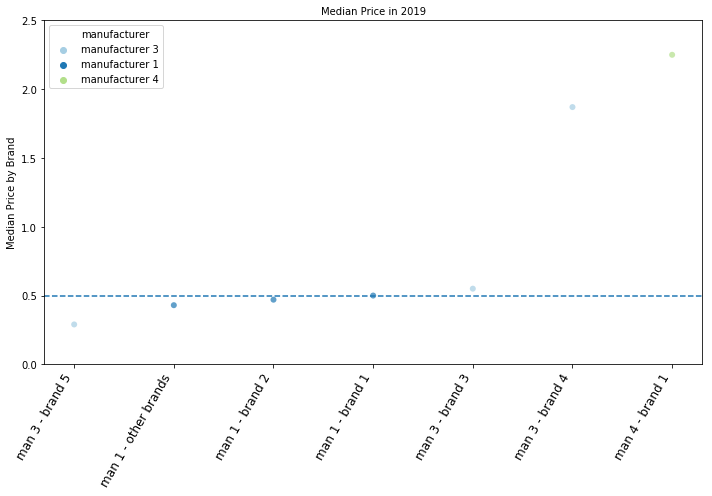

In [384]:
# Discount Leaders

with plt.style.context('tableau-colorblind10'):

# Prepare Data
    df = dataset[(
        (dataset['manufacturer'] == 'manufacturer 1') | (dataset['manufacturer'] == 'manufacturer 3') | (dataset['manufacturer'] == 'manufacturer 4')) 
                 & (dataset['segment'] == 'zero alcohol')].loc['2019'][['precio_real_unidades', 'brand','manufacturer']].groupby(['brand','manufacturer']).median()
    df.sort_values('precio_real_unidades', inplace=True)
    df.reset_index(inplace=True)
    y_median = df['precio_real_unidades'].median()

# Plot
    plt.figure(figsize=(10,7))
    sns.scatterplot(x=df.index, y=df.precio_real_unidades, hue=df.manufacturer, alpha=0.7, linewidth=20,palette="Paired")
    plt.axhline(y_median, linestyle='dashed')
    
# Decoration
    plt.title('Median Price in 2019', fontsize=10)
    plt.ylabel('Median Price by Brand')
    plt.xticks(df.index, df.brand, rotation=60, horizontalalignment='right', fontsize=12)
    plt.ylim(0,2.5)
    plt.tight_layout()
    plt.savefig('median_zero.png')

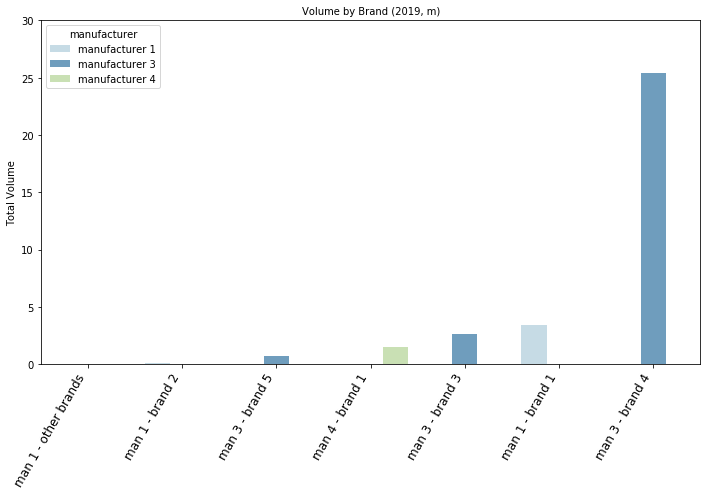

In [493]:
# Unit Leaders

with plt.style.context('tableau-colorblind10'):

# Prepare Data
    df =dataset[(
        (dataset['manufacturer'] == 'manufacturer 1') | (dataset['manufacturer'] == 'manufacturer 3') | (dataset['manufacturer'] == 'manufacturer 4')) 
                 & (dataset['segment'] == 'zero alcohol')].loc['2019'][['ventas_volumen', 'brand','manufacturer']].groupby(['brand','manufacturer']).sum() /1000000
    df.sort_values('ventas_volumen', inplace=True)
    df.reset_index(inplace=True)

# Plot
    plt.figure(figsize=(10,7))
    sns.barplot(x=df.index,y=df.ventas_volumen, alpha=0.7, linewidth=20, hue=df.manufacturer,palette='Paired')

# Decoration
    plt.title('Volume by Brand (2019, m)', fontsize=10)
    plt.ylabel('Total Volume')
    plt.xticks(df.index, df.brand, rotation=60, horizontalalignment='right', fontsize=12)
    plt.ylim((0,30))
    plt.tight_layout()
    plt.savefig('vol_zero')


In [494]:
df

,brand,manufacturer,ventas_volumen
0,man 1 - other brands,manufacturer 1,0.055253
1,man 1 - brand 2,manufacturer 1,0.096767
2,man 3 - brand 5,manufacturer 3,0.766003
3,man 4 - brand 1,manufacturer 4,1.536524
4,man 3 - brand 3,manufacturer 3,2.642366
5,man 1 - brand 1,manufacturer 1,3.452159
6,man 3 - brand 4,manufacturer 3,25.385778


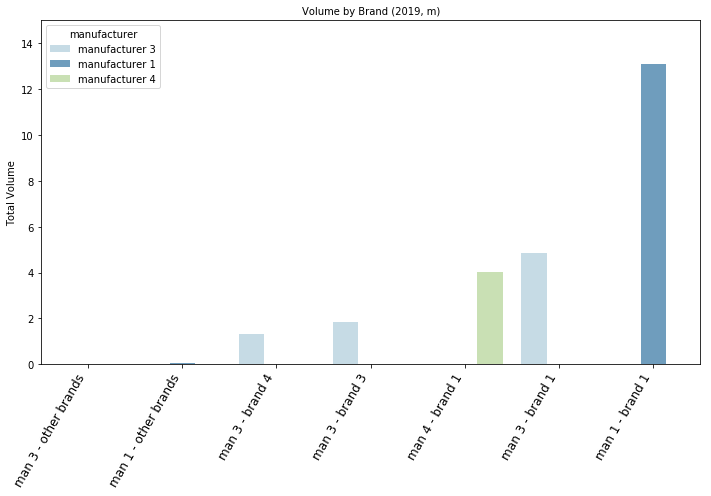

In [389]:
# Unit Leaders

with plt.style.context('tableau-colorblind10'):

# Prepare Data
    df =dataset[(
        (dataset['manufacturer'] == 'manufacturer 1') | (dataset['manufacturer'] == 'manufacturer 3') | (dataset['manufacturer'] == 'manufacturer 4')) 
                 & (dataset['segment'] == 'extra')].loc['2019'][['ventas_volumen', 'brand','manufacturer']].groupby(['brand','manufacturer']).sum() /1000000
    df.sort_values('ventas_volumen', inplace=True)
    df.reset_index(inplace=True)

# Plot
    plt.figure(figsize=(10,7))
    sns.barplot(x=df.index,y=df.ventas_volumen, alpha=0.7, linewidth=20, hue=df.manufacturer,palette='Paired')

# Decoration
    plt.title('Volume by Brand (2019, m)', fontsize=10)
    plt.ylabel('Total Volume')
    plt.xticks(df.index, df.brand, rotation=60, horizontalalignment='right', fontsize=12)
    plt.ylim((0,15))
    plt.tight_layout()
    plt.savefig('vol_extra')


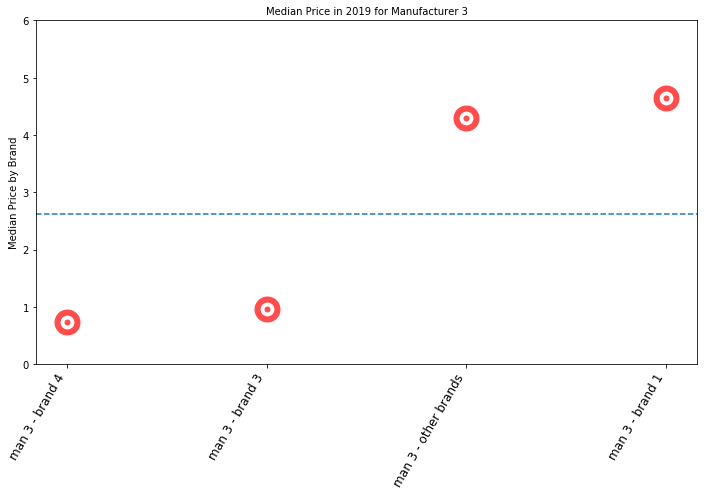

In [249]:
# Discount Leaders

with plt.style.context('tableau-colorblind10'):

# Prepare Data
    df = dataset[(dataset['manufacturer'] == 'manufacturer 3') & (dataset['segment'] == 'extra')].loc['2019'][['precio_real_unidades', 'brand']].groupby('brand').median()
    df.sort_values('precio_real_unidades', inplace=True)
    df.reset_index(inplace=True)
    y_median = df['precio_real_unidades'].median()

# Plot
    plt.figure(figsize=(10,7))
    plt.scatter(x=df.index, y=df.precio_real_unidades, color='red', alpha=0.7, linewidth=20)
    plt.axhline(y_median, linestyle='dashed')
    
# Decoration
    plt.title('Median Price in 2019 for Manufacturer 3', fontsize=10)
    plt.ylabel('Median Price by Brand')
    plt.xticks(df.index, df.brand, rotation=60, horizontalalignment='right', fontsize=12)
    plt.ylim(0,6)
    plt.tight_layout()
    plt.savefig('median_segment_MAN3.png')

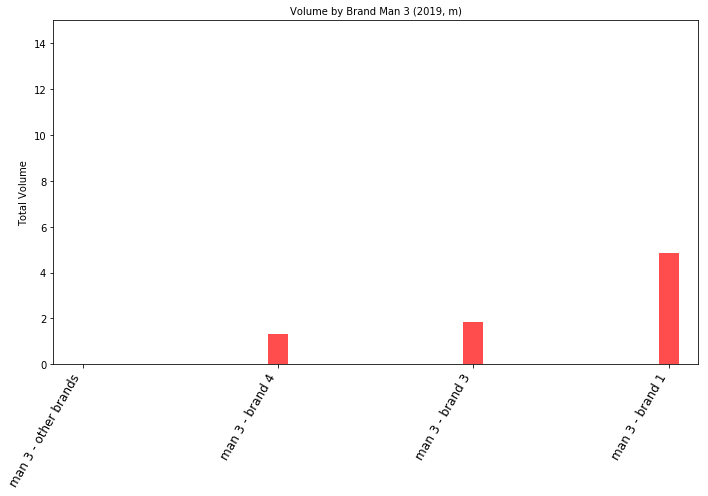

In [251]:
# Unit Leaders

with plt.style.context('tableau-colorblind10'):

# Prepare Data
    df =dataset[(dataset['manufacturer'] == 'manufacturer 3') & (dataset['segment'] == 'extra')].loc['2019'][['ventas_volumen', 'brand']].groupby('brand').sum() /1000000
    df.sort_values('ventas_volumen', inplace=True)
    df.reset_index(inplace=True)

# Plot
    plt.figure(figsize=(10,7))
    plt.vlines(x=df.index, ymin=0, ymax=df.ventas_volumen, color='red', alpha=0.7, linewidth=20)

# Decoration
    plt.title('Volume by Brand Man 3 (2019, m)', fontsize=10)
    plt.ylabel('Total Volume')
    plt.xticks(df.index, df.brand, rotation=60, horizontalalignment='right', fontsize=12)
    plt.ylim((0,15))
    plt.tight_layout()
    plt.savefig('vol_man_3')


#### Clustering Dataset

In [219]:
## median_price, mean_price, by stores


clustering_1 = dataset[dataset['segment']!='national'].groupby('cod_tienda').agg({'precio_real_unidades': "median", 
                                                  'Total':'sum',
                                                 'ventas_valor':'sum',
                                                 'ventas_volumen':'sum',
                                                 'ventas_unidades':'sum'})


In [ ]:
## median_price, mean_price, by stores


clusteringa_1 = dataset[dataset['segment']!='national'].groupby('cod_tienda').agg({'precio_real_unidades': "median", 
                                                  'Total':'sum',
                                                 'ventas_valor':'sum',
                                                 'ventas_volumen':'sum',
                                                 'ventas_unidades':'sum'})


In [220]:
clustering_2 = dataset[dataset['segment']!='national'].groupby('cod_tienda')[['segment', 'volume','packaging','manufacturer','units']].apply(lambda x: x.mode()).dropna()

In [221]:
clustering_final = clustering_1.merge(clustering_2, left_index=True, right_index=True)

In [222]:
clustering_final.to_csv(os.path.join(file_path,'clustering_dataset.csv'))

In [223]:
clustering_final.head()

,,precio_real_unidades,Total,ventas_valor,ventas_volumen,ventas_unidades,segment,volume,packaging,manufacturer,units
cod_tienda,,,,,,,,,,,
1,0,0.59,61.0,5.053097e+07,1.076782e+06,7.069453e+05,import premium,330.0,can,manufacturer 6,1.0
2,0,4.26,0.0,8.254704e+04,2.873100e+02,1.915400e+02,extra,330.0,cristal bottle,manufacturer 3,4.0
3,0,1.01,2101.0,5.214897e+08,3.185029e+06,6.977935e+06,extra,330.0,cristal bottle,manufacturer 2,1.0
4,0,1.35,11363.0,2.228977e+06,4.772842e+05,8.162550e+05,import premium,330.0,cristal bottle,other manufacturers,1.0
5,0,0.61,781.0,2.962361e+07,1.366905e+06,3.288850e+06,import premium,330.0,can,manufacturer 2,1.0


In [203]:
## median_price, mean_price, by stores


man_4_1= dataset[(dataset['manufacturer'] == 'manufacturer 4')&(dataset['segment']!='national')].groupby('cod_tienda').agg({'precio_real_unidades': "median", 
                                                  'Total':'sum',
                                                 'ventas_valor':'sum',
                                                 'ventas_volumen':'sum',
                                                 'ventas_unidades':'sum'})


In [204]:
man_4_2 = dataset[(dataset['manufacturer'] == 'manufacturer 4')&(dataset['segment']!='national')].groupby('cod_tienda')[['segment', 'volume','packaging','manufacturer','units']].apply(lambda x: x.mode()).dropna()

In [205]:
data_man4 = man_4_1.merge(man_4_2, left_index=True, right_index=True)

In [252]:
data_man4.head()

,,precio_real_unidades,Total,ventas_valor,ventas_volumen,ventas_unidades,segment,volume,packaging,manufacturer,units
cod_tienda,,,,,,,,,,,
3,0,3.690,3.0,297784.96,110798.83,80287.73,extra,330.0,cristal bottle,manufacturer 4,4.0
4,0,3.755,440.0,47419.87,23254.44,37735.59,extra,330.0,cristal bottle,manufacturer 4,6.0
5,0,2.290,3.0,4977.65,3424.95,2227.18,zero alcohol,250.0,cristal bottle,manufacturer 4,6.0
6,0,0.830,1.0,10841.17,4338.46,13246.62,extra,330.0,can,manufacturer 4,1.0
8,0,2.350,0.0,28429.55,17994.35,11628.39,zero alcohol,250.0,cristal bottle,manufacturer 4,6.0


In [209]:
data_man4.to_csv(os.path.join(file_path, 'man4'))

In [398]:
growth = pd.DataFrame(dataset[(dataset['manufacturer'] == 'manufacturer 4')].resample('Y')['ventas_valor','segment'].groupby('segment').sum())

AttributeError: Cannot access callable attribute 'groupby' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [67]:
compound_sales_growth = pd.DataFrame(dataset[(dataset['manufacturer'] == 'manufacturer 4')].loc['2017':'2019',:].groupby([pd.Grouper(freq='Y'), 'segment'])['ventas_valor'].sum()).unstack().T.reset_index('segment')
compound_sales_growth.index = compound_sales_growth['segment']

In [419]:
sales_2019 = compound_sales_growth.iloc[:,3]

In [66]:
compound_sales_growth = pd.DataFrame(dataset.loc['2017':'2019',:].groupby([pd.Grouper(freq='Y'), 'segment'])['ventas_valor'].sum()).unstack().T.reset_index('segment')
compound_sales_growth.index = compound_sales_growth['segment']
cagr = ((((compound_sales_growth.iloc[:,3] / compound_sales_growth.iloc[:,1])) ** (1/(2019-2017))) - 1)*100


In [68]:
cagr = pd.DataFrame(cagr)

In [70]:
compound_sales_growth = pd.DataFrame(compound_sales_growth.iloc[:,3])

IndexError: single positional indexer is out-of-bounds

In [71]:
sales_2019  = cagr.merge(compound_sales_growth /1000000, right_index=True, left_index=True)

In [72]:
sales_2019.columns = ['industry_cagr','2019']

In [73]:
sales_2019['2020F'] = (sales_2019['2019']) * (1+(sales_2019['industry_cagr'] / 100-0.011))

In [74]:
sales_2019

,industry_cagr,2019,2020F
segment,,,
artisans,8.524213,0.049341,0.053004
black,-17.630392,0.152507,0.123942
extra,-9.674874,10.229803,9.127554
flavoured,-7.304878,0.082686,0.075736
national,-14.818111,45.782715,38.494972
zero alcohol,-6.167559,2.545542,2.360543


In [75]:
sales_2019['2021F'] = (sales_2019['2020F']) * (1+((sales_2019['industry_cagr'] / 100-0.09)))

In [76]:
sales_2019

,industry_cagr,2019,2020F,2021F
segment,,,,
artisans,8.524213,0.049341,0.053004,0.052751
black,-17.630392,0.152507,0.123942,0.090935
extra,-9.674874,10.229803,9.127554,7.422995
flavoured,-7.304878,0.082686,0.075736,0.063388
national,-14.818111,45.782715,38.494972,29.326196
zero alcohol,-6.167559,2.545542,2.360543,2.002506


In [77]:
round(sales_2019[['2019','2020F','2021F']],2)

,2019,2020F,2021F
segment,,,
artisans,0.05,0.05,0.05
black,0.15,0.12,0.09
extra,10.23,9.13,7.42
flavoured,0.08,0.08,0.06
national,45.78,38.49,29.33
zero alcohol,2.55,2.36,2.00
